In [9]:
### Analysis of profilometer data of Gray Scale lithography tests

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib import colors
from scipy import stats

In [10]:
%matplotlib inline

##### Expected grayscale parameters


# Photo resist thicnkess [um]
nominal_thickness = 2.34 #um

## Width of the bottom of the pyramid
nominal_pyramid_width = 510 #um

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx]

def find_nearest_idx(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

def cumsum_difference(x1, x2, size=None):
    maxidx = size or min([len(x1),len(x2)])
    return np.sum(np.abs(x1[0:maxidx]-x2[0:maxidx]))
    
def middle_idx(y, search_range=None, size=None, debug=False):
    list_idx = np.arange(0,len(y),1)
    mididx = int(len(y)/2)
    search_range = search_range or int(len(y)*1/4)
    list_idx = np.arange(mididx-search_range, mididx+search_range,1)
    # list_idx = [int(len(y)/2)]

    result_diff = []
    result_idx = []
    for i,idx in enumerate(list_idx):
        part1, part2 = np.split(y, [idx])
        part1 = np.flip(part1, axis=0)

        diff = cumsum_difference(part1, part2, size=size)
    #     print(i, diff)
        result_diff.append(diff)
        result_idx.append(idx)
        
    midpointidx = list_idx[np.argmin(result_diff)]
    
    if debug:
        plt.plot(y, label='left', c='C0') 
        plt.plot(result_idx, result_diff/np.ptp(result_diff),c='C3')
        plt.axvline(midpointidx, c='k')
    return midpointidx

['0to118.txt', '115to118.txt', '90to93.txt']
Opening Z:\CleanRoom\Optical microscope\JoanaSantos\MEMS153_Fresnel\Test02\W03 Glass\Profilometer_AfterLitho\0to118.txt
1    0to118
Name: Data, dtype: object [0.100769] ['-278.40'] ['13787.38']
[0.00000000e+00 1.00769000e-01 2.01538000e-01 ... 1.24997898e+04
 1.24998906e+04 1.24999914e+04]


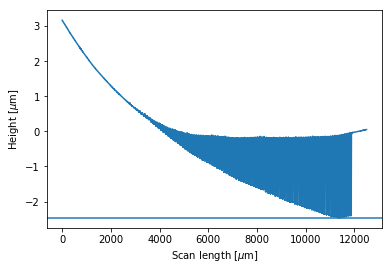

In [11]:
directory = "\\INL-FPS01\Data\CleanRoom\Optical microscope\JoanaSantos\CI-over\profilometer\\"
directory = "\\INL-FPS01\\Data\\CleanRoom\\Optical microscope\\JoanaSantos\\MEMS153_Fresnel\\Test02\\"
directory = "Z:\CleanRoom\\Optical microscope\\JoanaSantos\\MEMS153_Fresnel\\Test02\\W03 Glass\\Profilometer_AfterLitho\\"
# directory = "\\INL-FPS01\\Data\\CleanRoom\\Optical microscope\\JoanaSantos\\MEMS153_Fresnel\\Test02\\W01 Glass\\Profilometer_AfterEtch\\textdata\\"
# directory = "Z:\CleanRoom\\Optical microscope\\JoanaSantos\\MEMS153_Fresnel\\Test02\\W01 Glass\\Profilometer_AfterEtch\\textdata\\"


# files
root_dir = os.path.abspath(directory)
files = os.listdir(root_dir)
prefix =  ".txt"
files = [file for file in files if prefix in file]

# filenames = [os.path.join(root_dir, file) for file in files]
# list_data = load_all_data(filenames)
print(files)
file = files[0]

filename = os.path.join(root_dir, file)
print("Opening",filename)

# Header points

df_header = pd.read_csv(filename, sep='\s+',header=None, nrows=7 )
df_header = df_header.T
df_header.columns = df_header.iloc[0]
df_header = df_header.reindex(df_header.index.drop(0))
name = df_header.Data
x_resolution = df_header['X-Resolution'].astype('float').values
y_resolution = 0.0001
x_coord = df_header['X-Coord'].values
y_coord = df_header['Y-Coord'].values

print(name, x_resolution,x_coord, y_coord)


df_header


# Data points
df = pd.read_csv(filename, sep='\s+',header=0, skiprows=7)

x = np.arange(len(df.Intermediate))*x_resolution
print(x)
y = df['Normal']*y_resolution
plt.plot(x, y, )

plt.xlabel('Scan length [$\mu$m]')
plt.ylabel('Height [$\mu$m]')

miny = np.min(y)




plt.axhline(miny)

In [4]:
gs1, gs2 = file.split('.txt')[0].split('to')
gs1 = np.int(gs1)
gs2= np.int(gs2)
gs1,gs2

(0, 118)

In [26]:

print(files)
for file in files:
    if '_' in file:
        files.remove(file)
        
print(files)

['0to4.txt', '0to9.txt', '100to103.txt', '104to107.txt', '108to111.txt', '112to115.txt', '116to118.txt', '12to15.txt', '16to19.txt', '20to23.txt', '24to27.txt', '28to31.txt', '32to35.txt', '36to39.txt', '40to43.txt', '44to47.txt', '48to51.txt', '4to7.txt', '52to55.txt', '56to59.txt', '60to63.txt', '64to67.txt', '68to71.txt', '72to75.txt', '76to79.txt', '80to83.txt', '84to87.txt', '88to91.txt', '8to11.txt', '92to95.txt', '96to99.txt']
['0to4.txt', '0to9.txt', '100to103.txt', '104to107.txt', '108to111.txt', '112to115.txt', '116to118.txt', '12to15.txt', '16to19.txt', '20to23.txt', '24to27.txt', '28to31.txt', '32to35.txt', '36to39.txt', '40to43.txt', '44to47.txt', '48to51.txt', '4to7.txt', '52to55.txt', '56to59.txt', '60to63.txt', '64to67.txt', '68to71.txt', '72to75.txt', '76to79.txt', '80to83.txt', '84to87.txt', '88to91.txt', '8to11.txt', '92to95.txt', '96to99.txt']


In [7]:
split_sections = np.arange(128)*100+100
split_sections

array([  100,   200,   300,   400,   500,   600,   700,   800,   900,
        1000,  1100,  1200,  1300,  1400,  1500,  1600,  1700,  1800,
        1900,  2000,  2100,  2200,  2300,  2400,  2500,  2600,  2700,
        2800,  2900,  3000,  3100,  3200,  3300,  3400,  3500,  3600,
        3700,  3800,  3900,  4000,  4100,  4200,  4300,  4400,  4500,
        4600,  4700,  4800,  4900,  5000,  5100,  5200,  5300,  5400,
        5500,  5600,  5700,  5800,  5900,  6000,  6100,  6200,  6300,
        6400,  6500,  6600,  6700,  6800,  6900,  7000,  7100,  7200,
        7300,  7400,  7500,  7600,  7700,  7800,  7900,  8000,  8100,
        8200,  8300,  8400,  8500,  8600,  8700,  8800,  8900,  9000,
        9100,  9200,  9300,  9400,  9500,  9600,  9700,  9800,  9900,
       10000, 10100, 10200, 10300, 10400, 10500, 10600, 10700, 10800,
       10900, 11000, 11100, 11200, 11300, 11400, 11500, 11600, 11700,
       11800, 11900, 12000, 12100, 12200, 12300, 12400, 12500, 12600,
       12700, 12800]

In [15]:
files = [files[0]]

0 0.000 -0.000 -0.001


C:\Users\daguiam264\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


1 0.000 -0.001 -0.001
2 0.001 -0.002 -0.002
3 0.000 -0.001 -0.001
4 0.000 -0.001 -0.001
5 0.000 -0.001 -0.001
6 0.000 -0.001 -0.001
7 0.001 -0.001 -0.002
8 0.001 -0.002 -0.003
9 0.001 -0.001 -0.003
10 0.000 -0.001 -0.001
11 0.000 -0.001 -0.001
12 0.000 -0.002 -0.002
13 0.000 -0.001 -0.001
14 0.000 -0.001 -0.001
15 0.000 -0.001 -0.001
16 0.000 -0.001 -0.001
17 0.000 -0.001 -0.001
18 0.000 -0.001 -0.002
19 0.001 -0.001 -0.002


C:\Users\daguiam264\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


20 0.000 -0.002 -0.002
21 0.000 -0.002 -0.002
22 0.000 -0.002 -0.002
23 0.000 -0.002 -0.002
24 0.001 -0.002 -0.002
25 0.000 -0.003 -0.003
26 0.000 -0.004 -0.004
27 0.003 -0.008 -0.012
28 0.000 -0.007 -0.008
29 0.000 -0.011 -0.011
30 -0.000 -0.015 -0.015
31 0.001 -0.027 -0.028
32 0.003 -0.023 -0.026
33 0.002 -0.046 -0.048
34 0.003 -0.056 -0.059
35 0.001 -0.059 -0.060
36 0.001 -0.072 -0.072
37 0.001 -0.084 -0.085
38 0.001 -0.105 -0.106
39 0.001 -0.132 -0.134
40 0.001 -0.142 -0.143
41 0.001 -0.170 -0.171
42 0.000 -0.190 -0.190
43 0.000 -0.217 -0.217
44 0.000 -0.247 -0.247
45 0.000 -0.276 -0.276
46 0.000 -0.301 -0.301
47 0.000 -0.332 -0.332
48 0.000 -0.365 -0.365
49 0.000 -0.401 -0.401
50 0.000 -0.436 -0.436
51 0.000 -0.464 -0.464
52 0.000 -0.501 -0.501
53 0.000 -0.535 -0.535
54 0.000 -0.564 -0.564
55 0.001 -0.599 -0.600
56 -0.000 -0.642 -0.642
57 0.001 -0.683 -0.684
58 0.000 -0.696 -0.696
59 0.000 -0.735 -0.735
60 0.000 -0.771 -0.771
61 0.001 -0.805 -0.805
62 0.001 -0.841 -0.842
63 0.000 

No handles with labels found to put in legend.


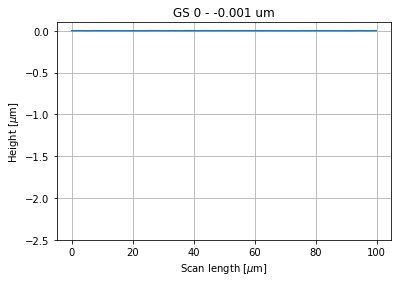

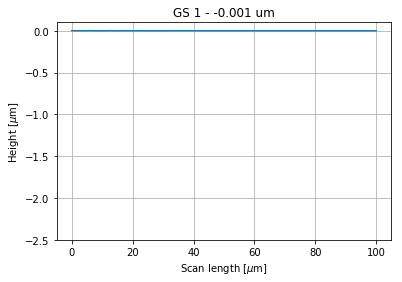

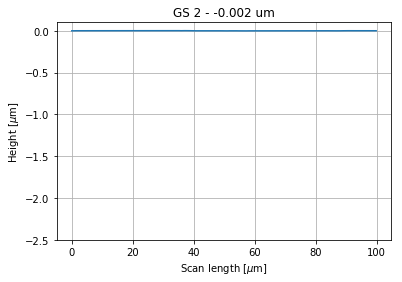

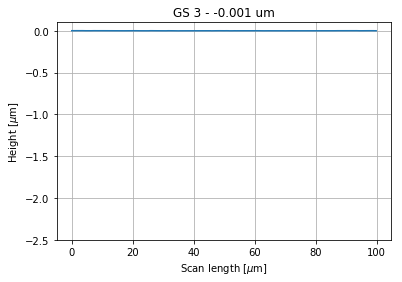

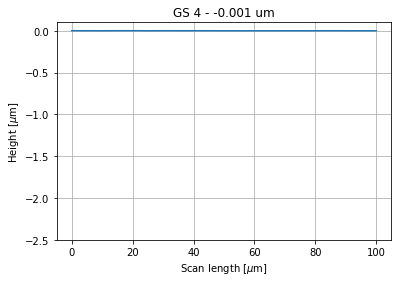

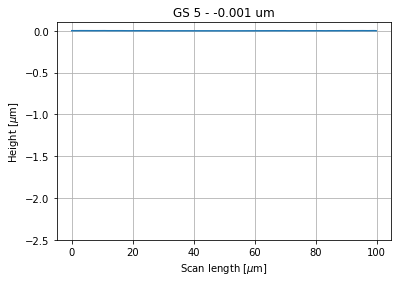

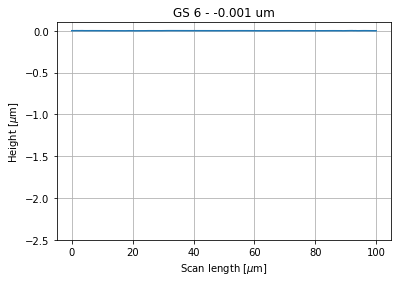

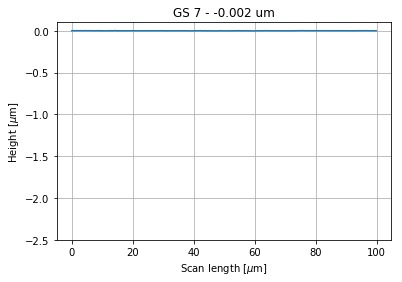

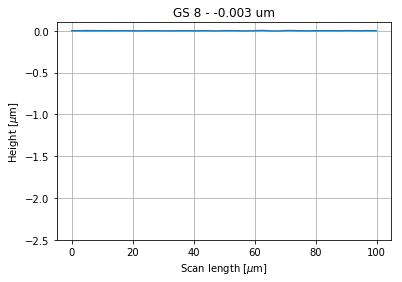

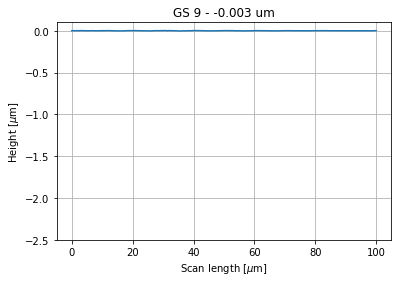

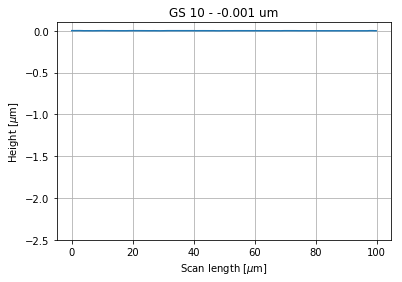

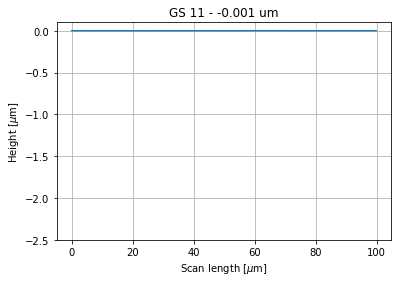

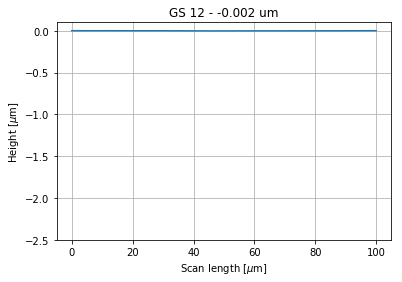

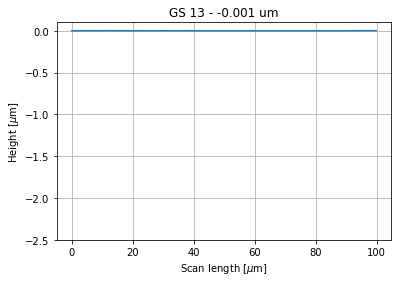

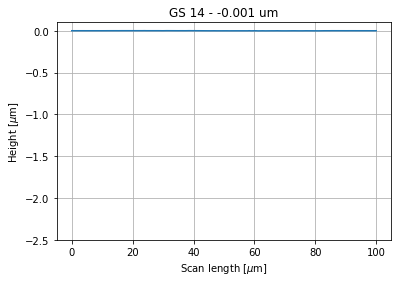

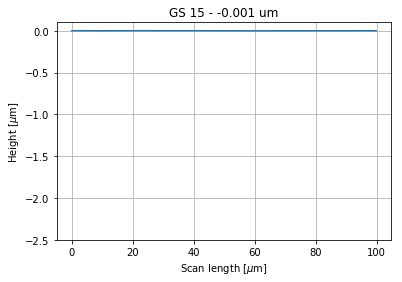

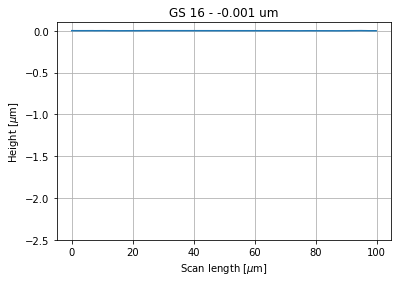

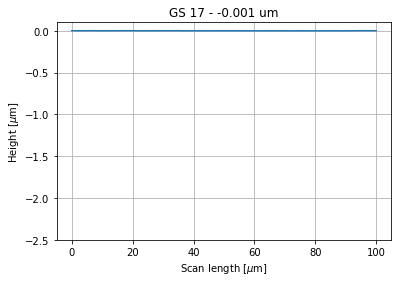

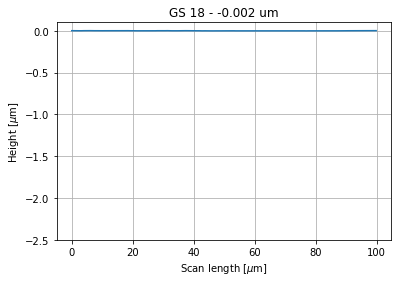

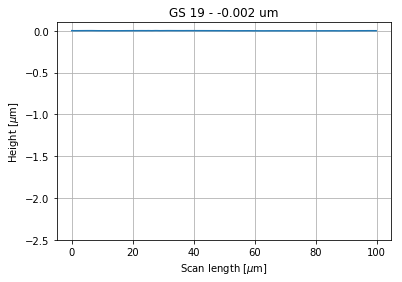

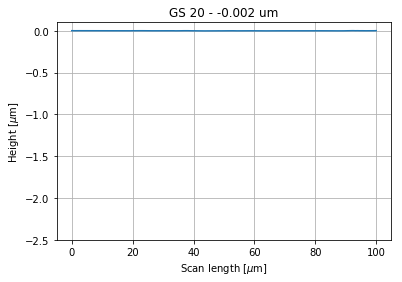

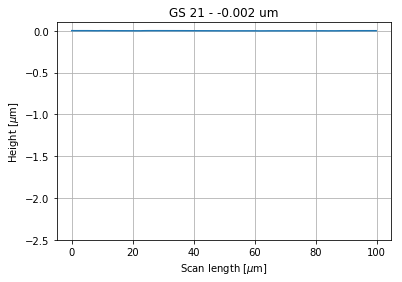

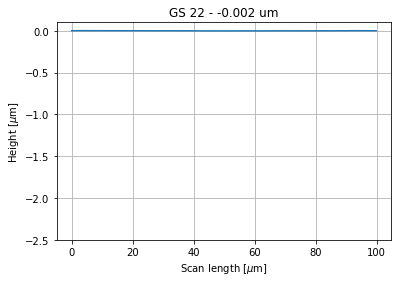

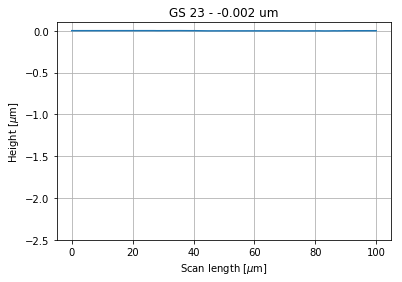

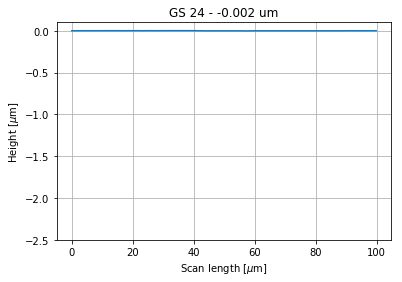

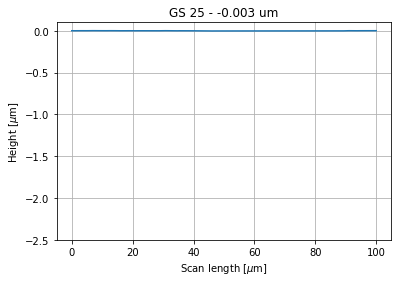

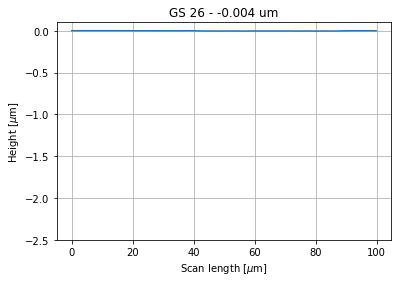

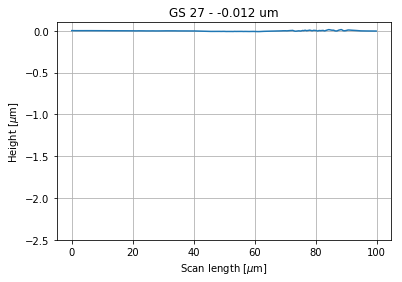

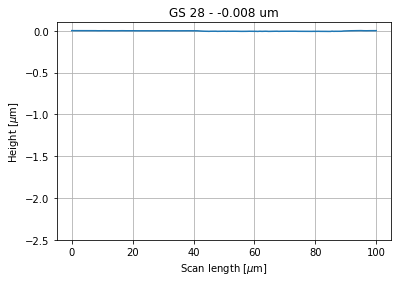

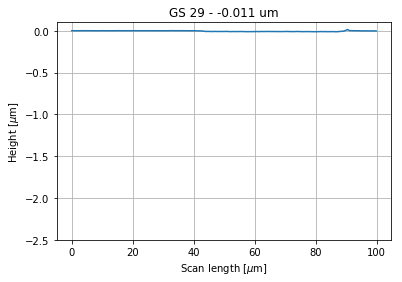

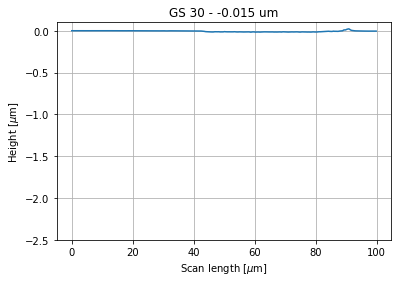

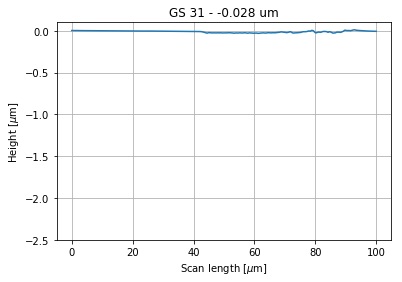

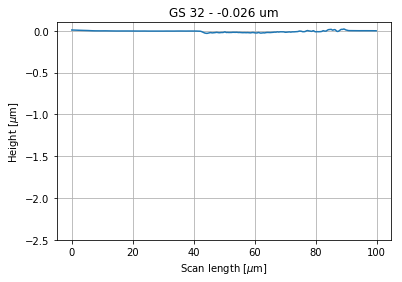

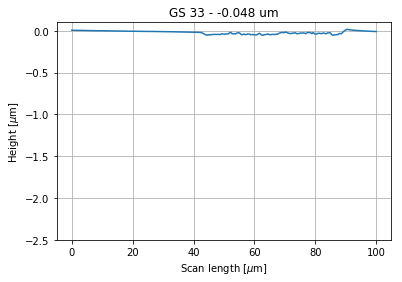

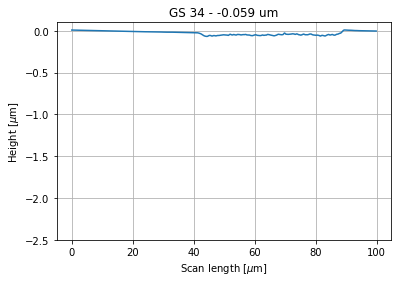

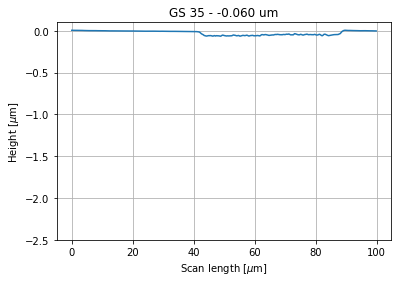

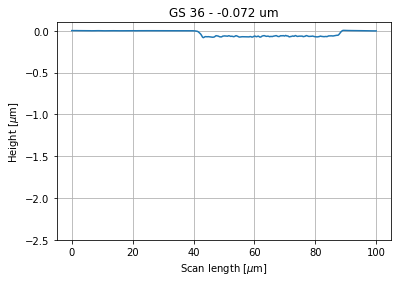

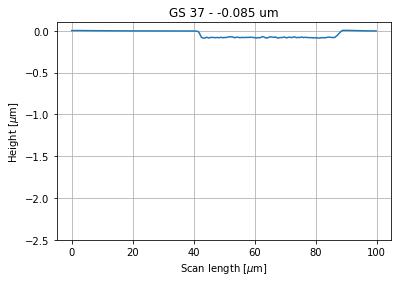

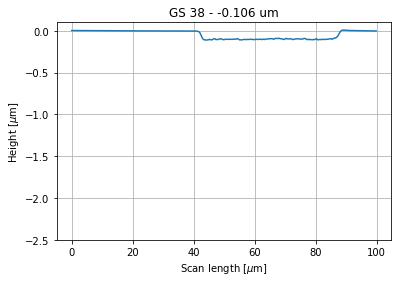

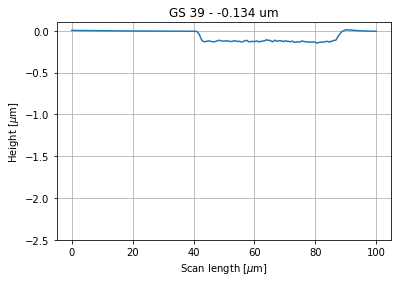

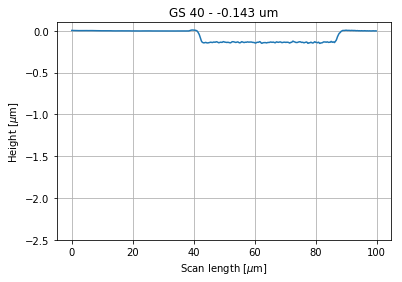

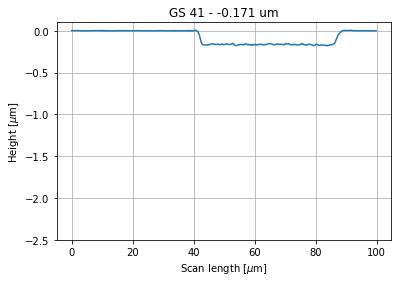

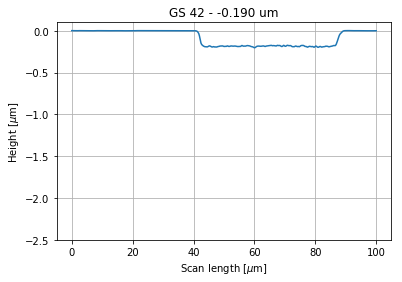

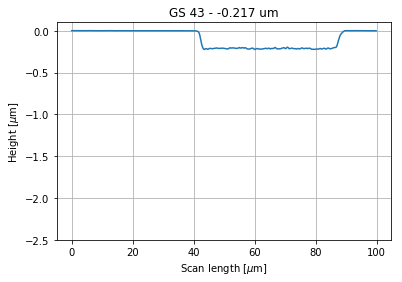

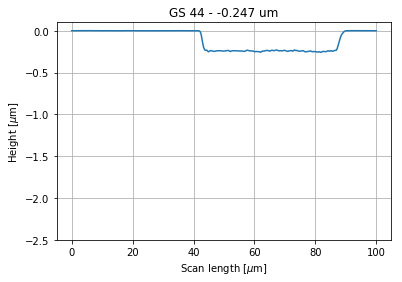

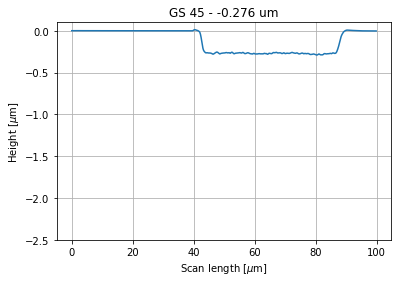

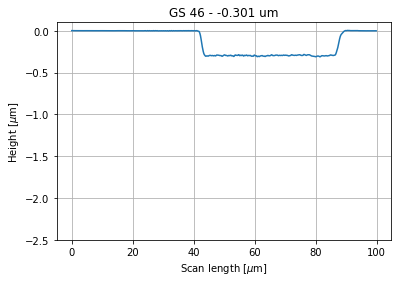

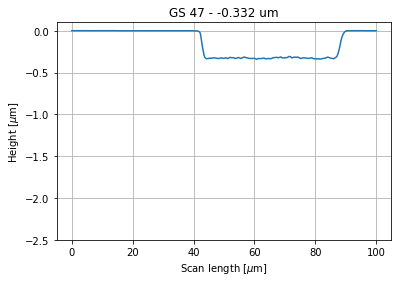

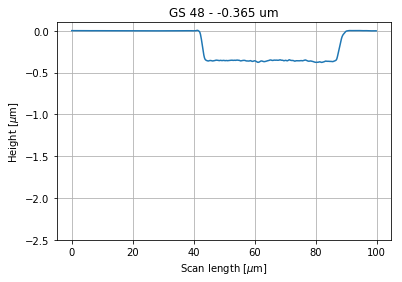

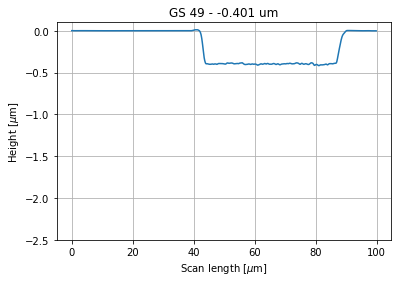

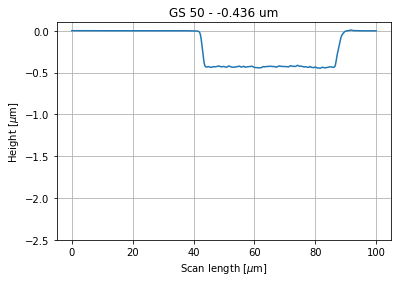

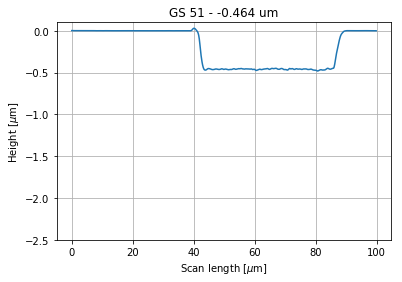

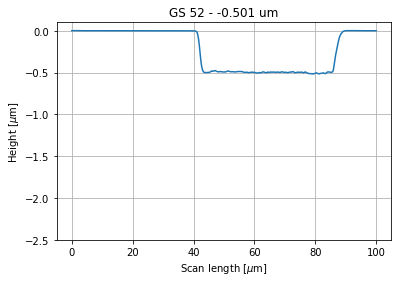

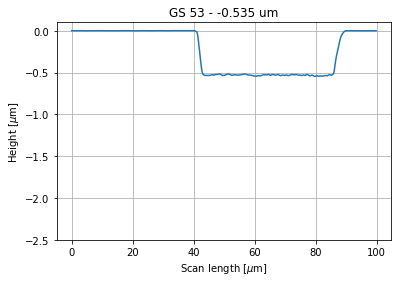

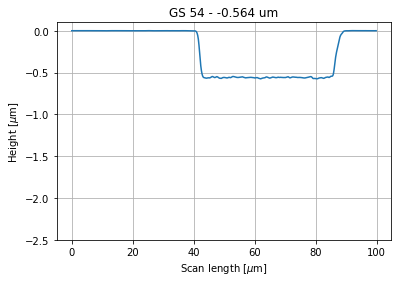

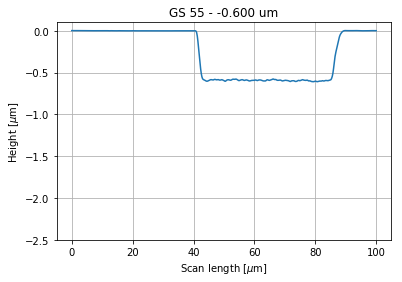

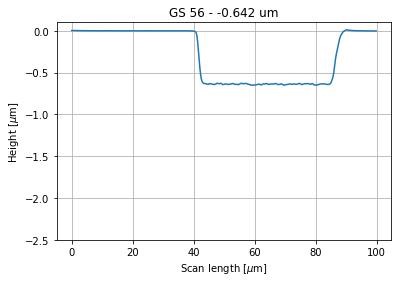

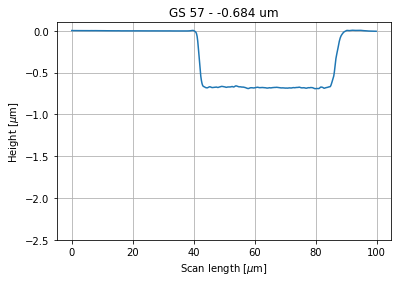

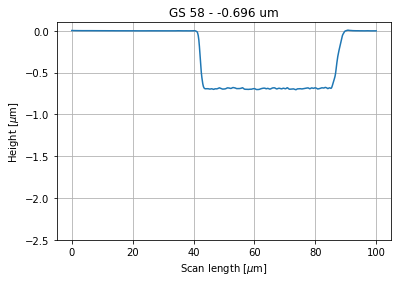

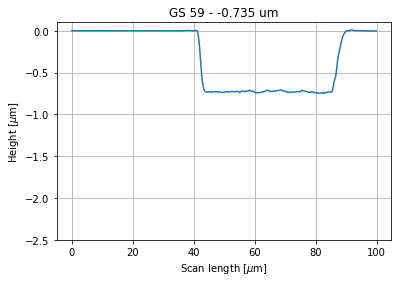

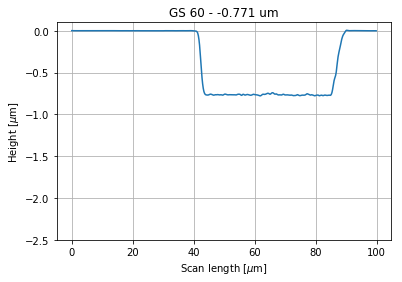

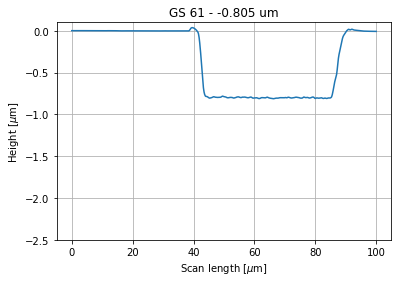

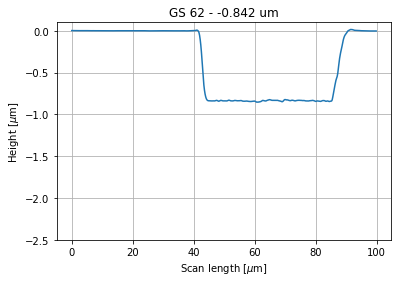

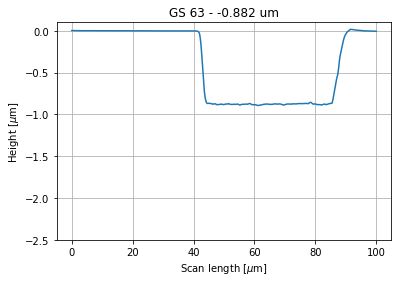

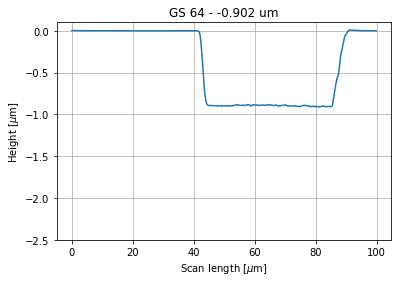

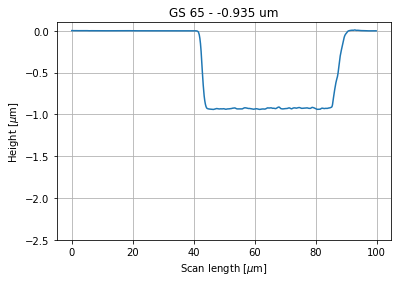

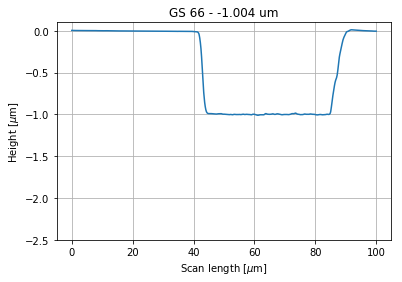

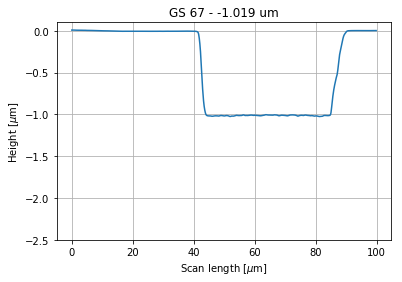

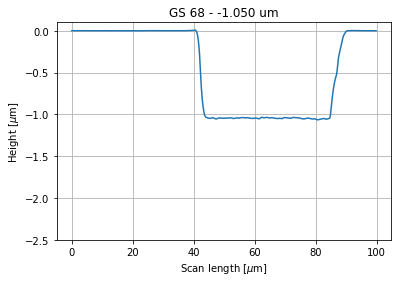

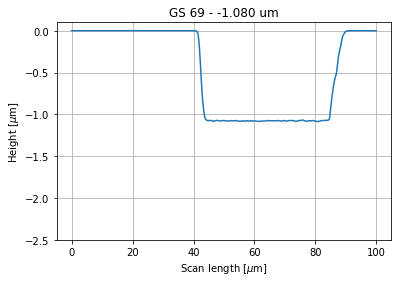

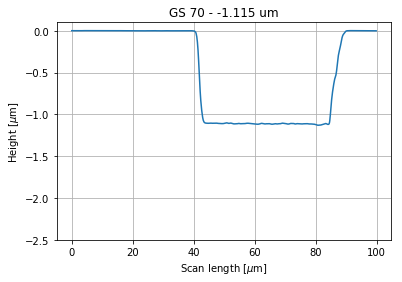

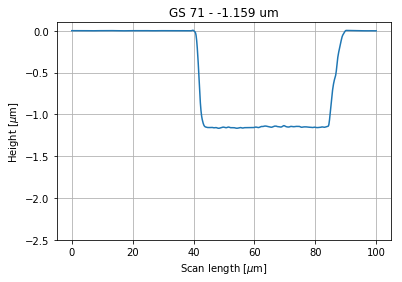

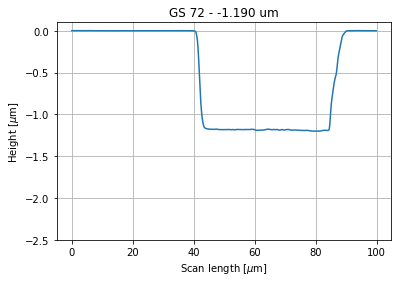

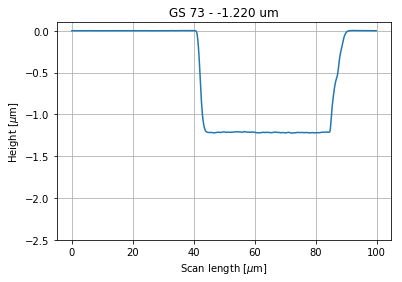

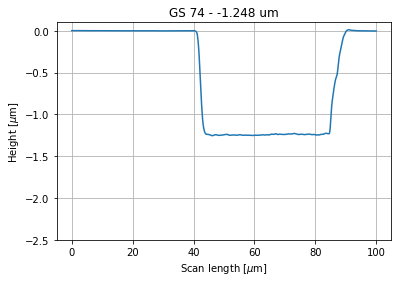

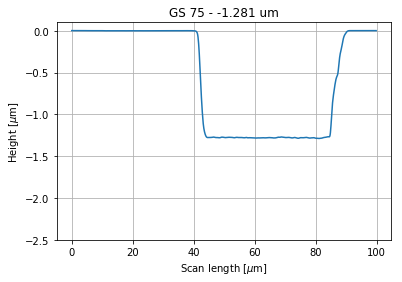

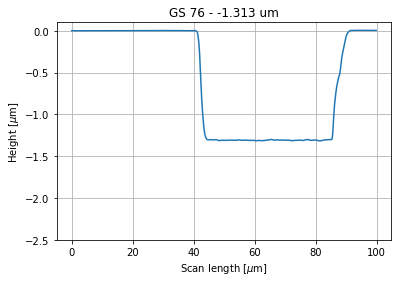

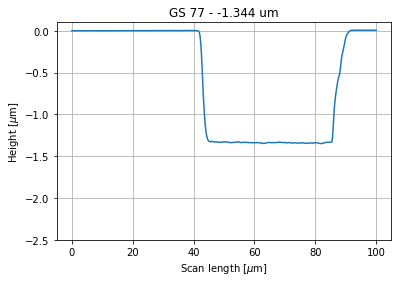

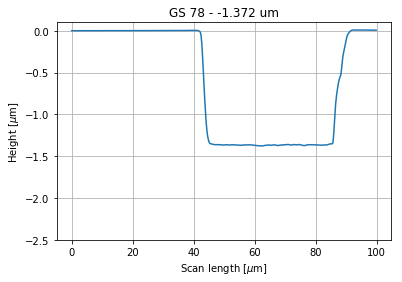

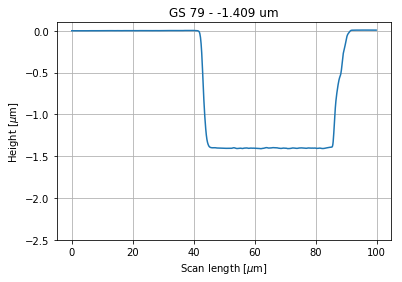

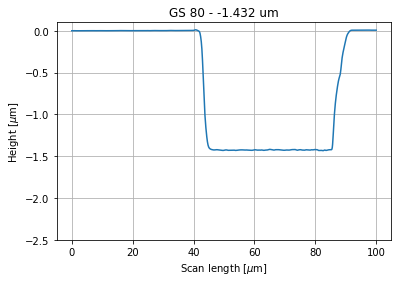

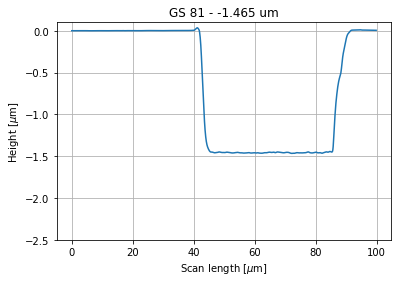

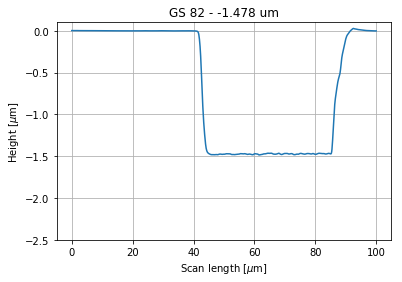

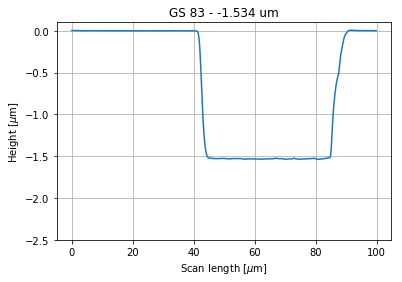

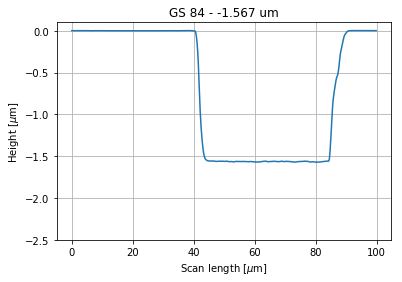

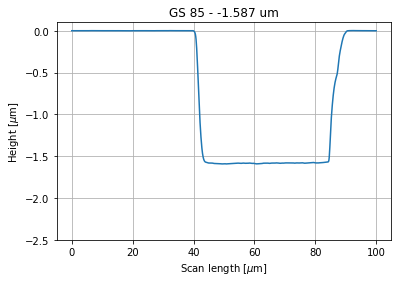

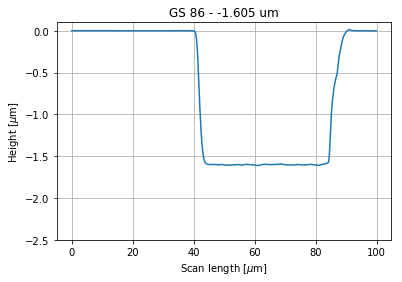

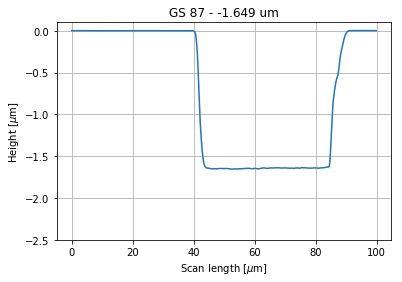

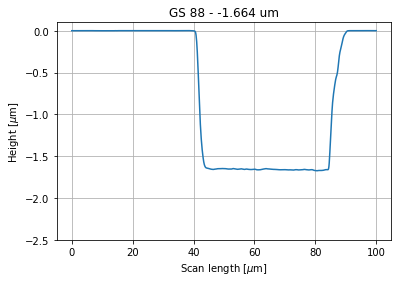

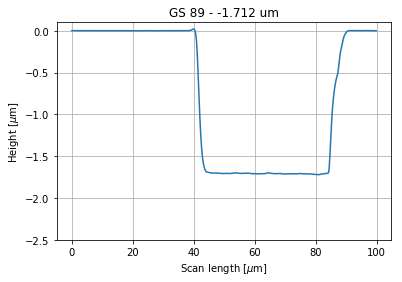

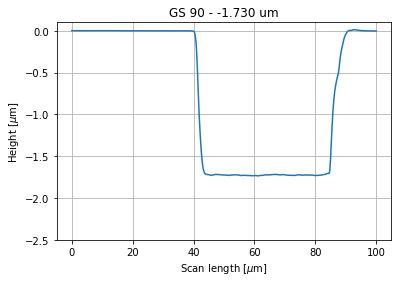

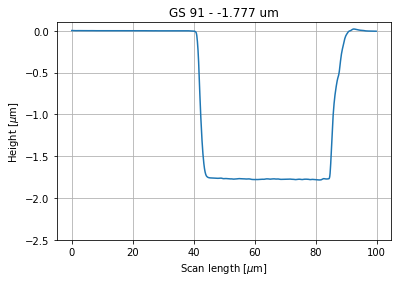

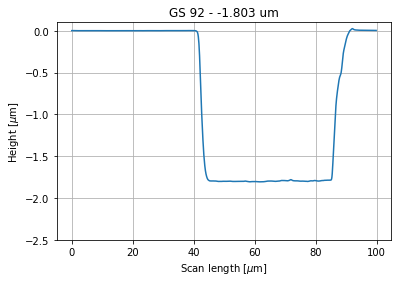

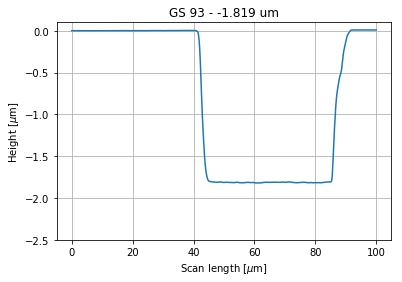

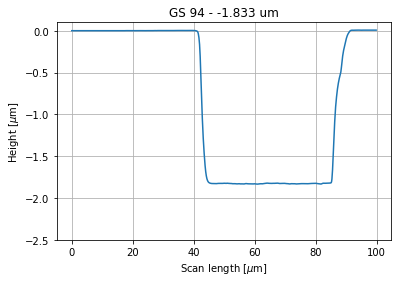

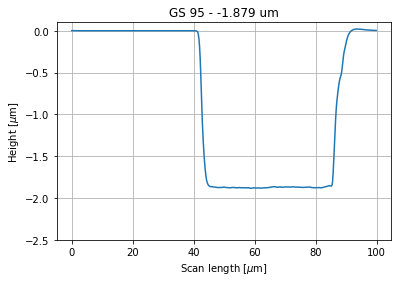

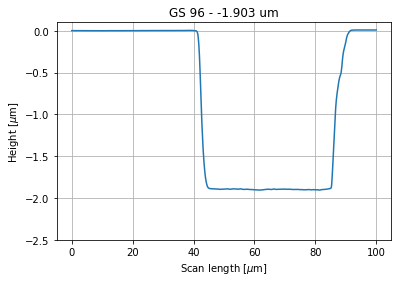

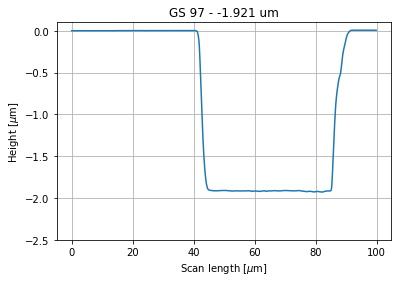

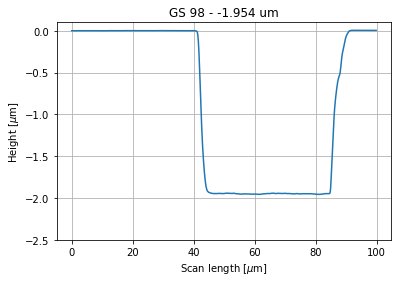

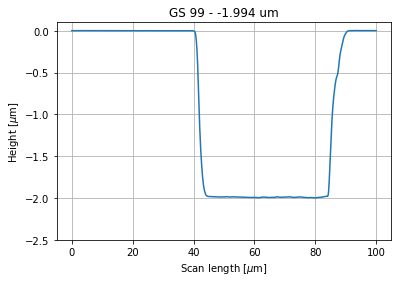

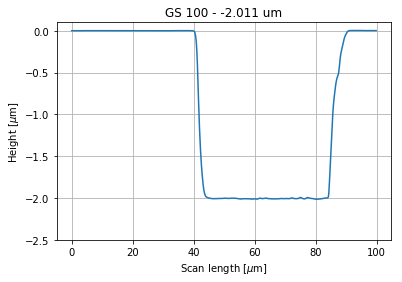

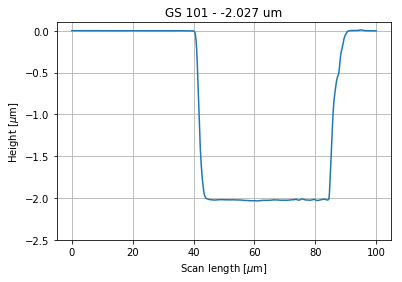

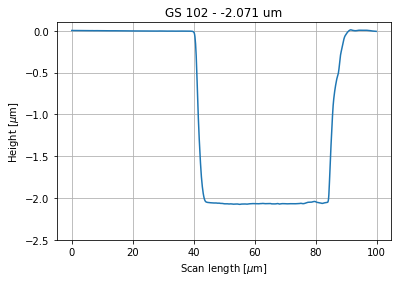

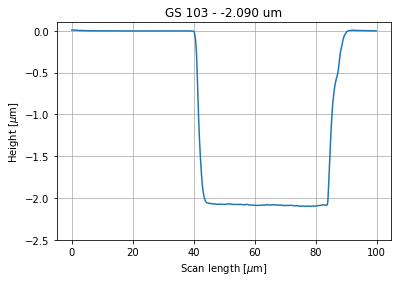

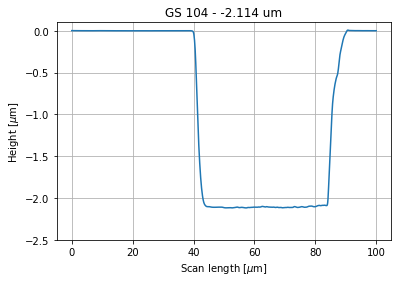

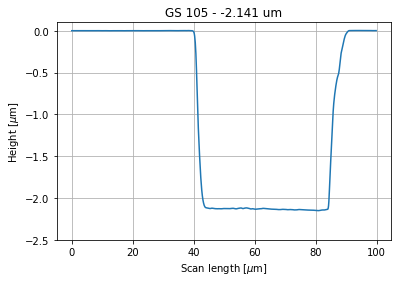

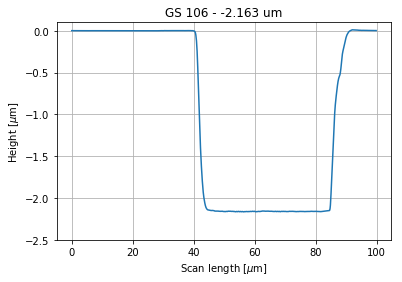

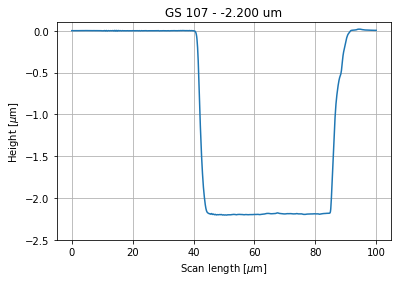

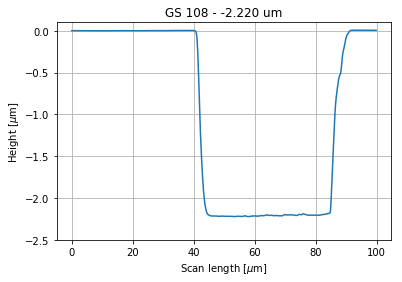

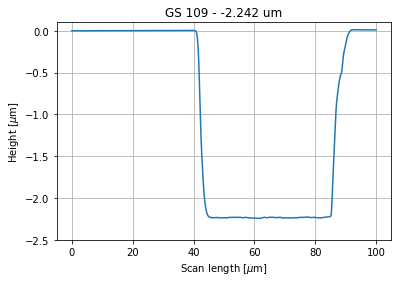

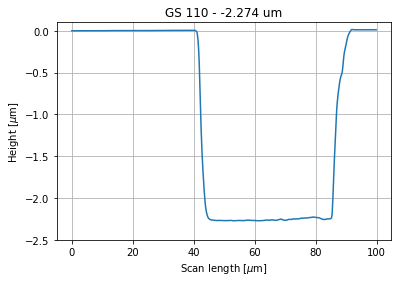

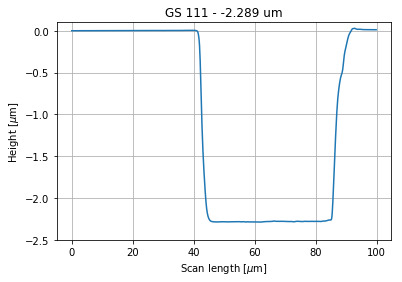

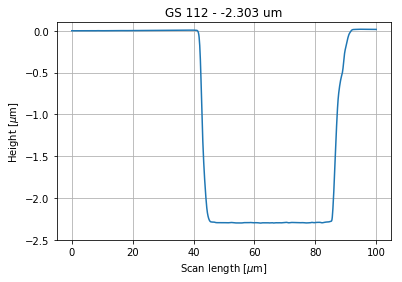

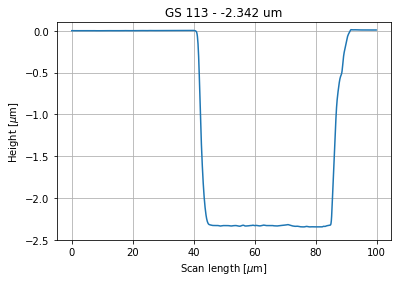

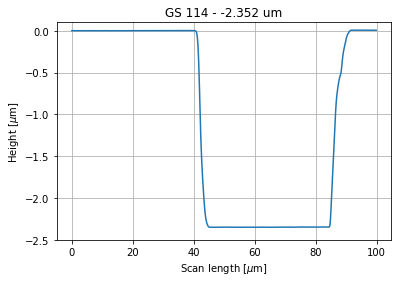

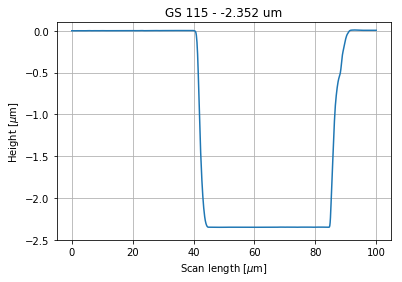

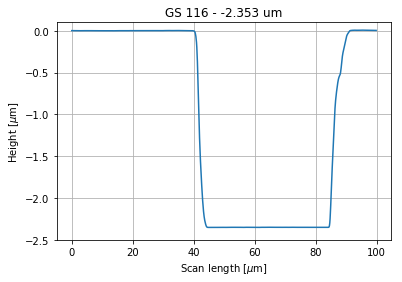

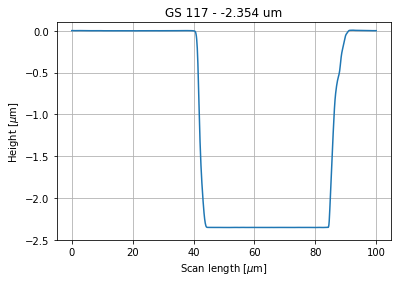

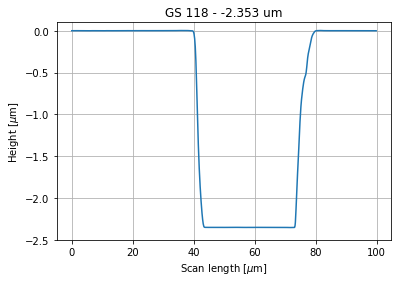

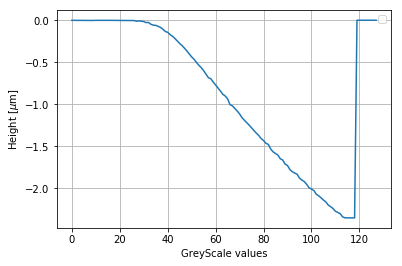

In [16]:
%matplotlib inline

#### FOR complete 128 depths measurement
max_depths = 128
split_sections = [100,200,300]
split_sections = np.arange(128)*100+100
surface_percentile = 90
bottom_percentile = 10
greyscales = np.zeros(128)

max_depth = -2.5
max_height = 0.1

save_plots = False
save_plots = True

for file_i,file in enumerate(files):
    filename = os.path.join(root_dir, file)
#     print("Opening",filename)
    
    gs1, gs2 = file.split('.txt')[0].split('to')
    gs1 = np.int(gs1)
    gs2= np.int(gs2)
    gs1,gs2
    gslen = gs2-gs1
    
    if gslen >max_depths-1 :
        continue  
    gs_values = np.arange(gs1,gs2+1)
#     print('from',gs1,'to',gs2, gslen, gs_values)
    


        
    # Header points

    df_header = pd.read_csv(filename, sep='\s+',header=None, nrows=7 )
    df_header = df_header.T
    df_header.columns = df_header.iloc[0]
    df_header = df_header.reindex(df_header.index.drop(0))
    name = df_header.Data
    x_resolution = df_header['X-Resolution'].astype('float').values
    y_resolution = 0.0001
    x_coord = df_header['X-Coord'].values
    y_coord = df_header['Y-Coord'].values

#     print(name, x_resolution,x_coord, y_coord)


    df_header


    # Data points
    df = pd.read_csv(filename, sep='\s+',header=0, skiprows=7)

    x = np.arange(len(df.Intermediate))*x_resolution
#     print(x)
    y = df['Normal']*y_resolution
#     plt.plot(x, y, label=file_i)


    sections = [find_nearest_idx(x, val) for val in split_sections]
    x_divs = np.split(x, sections)
    y_divs = np.split(y, sections)
    
    
#     print(len(x_divs), x_divs)

    # INDIVIDUAL MEASUREMENTS
    for i,(x, y) in enumerate(zip(x_divs,y_divs)):
        if i > gslen:
            break
        x = x-x[0]
        gs = gs_values[i]
        
#         plt.plot(x, y, label=gs)

    # RELINEARIZE

        edge_thresholds = [20,90]
    #     plt.plot(x,y)

        sections = [find_nearest_idx(x, val) for val in edge_thresholds]
        x_edge = np.split(x, sections)
        y_edge = np.split(y, sections)

        x_edge = np.append(x_edge[0],x_edge[-1])
        y_edge = np.append(y_edge[0],y_edge[-1])


    #     plt.plot(x_edge, y_edge, '.')
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_edge,y_edge)

        y_lin = slope*x+intercept
#         plt.plot(x,y_lin,linestyle='--', lw=0.5)
        y_linearized = y-y_lin
        
        plt.figure()
        
        
        plt.plot(x,y_linearized)
        
        surface = np.percentile(y_linearized, surface_percentile)
        bottom = np.percentile(y_linearized, bottom_percentile)
        height = bottom-surface
        
        print(gs, "%0.3f"%surface, "%0.3f"%bottom, "%0.3f"%height)
        
        greyscales[gs] = height
    

        title = 'GS %d - %0.3f um'%(gs, height)
        plt.title(title)
        
        plt.xlabel('Scan length [$\mu$m]')
        plt.ylabel('Height [$\mu$m]')
        plt.ylim(max_depth,max_height)
        plt.grid('on')
        fig_filename = 'gs%d.png'%(gs)
        filename = os.path.join(root_dir, fig_filename)
        if save_plots:
            plt.savefig(filename)
        
    
gs_heights = greyscales
print(greyscales)

plt.figure()
gs_levels = np.arange(len(gs_heights))
plt.plot(gs_levels, gs_heights)
plt.grid('on')
plt.xlabel('GreyScale values')
plt.ylabel('Height [$\mu$m]')
fig_filename = 'gs_scale.png'
filename = os.path.join(root_dir, fig_filename)
if save_plots:

    plt.savefig(filename)
plt.legend()

In [158]:
greyscale_calibration = np.array([gs_levels, gs_heights]).T

gs_filename = 'greyscale_calibration.txt'
filename = os.path.join(root_dir, gs_filename)
header = 'Grayscale level, step height [um]'
np.savetxt(filename, greyscale_calibration, delimiter=',', fmt='%d,%0.4f', header=header) 

#### 4 depths per measurement

100 0.001 -0.468 -0.469
101 0.001 -0.479 -0.480


C:\Users\daguiam264\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


102 0.000 -0.485 -0.486
103 0.004 -0.485 -0.489
104 0.001 -0.496 -0.497
105 0.001 -0.516 -0.516
106 0.001 -0.512 -0.514
107 0.002 -0.507 -0.508
108 0.000 -0.520 -0.520
109 0.003 -0.531 -0.533
110 0.011 -0.488 -0.499
111 0.004 -0.530 -0.534
112 0.005 -0.554 -0.559
113 0.008 -0.497 -0.505
114 0.001 -0.535 -0.536
115 0.002 -0.538 -0.540
116 0.001 -0.542 -0.542
117 0.000 -0.544 -0.544
118 0.003 -0.525 -0.528
12 0.001 -0.003 -0.004


C:\Users\daguiam264\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


13 0.000 -0.002 -0.002
14 0.000 -0.001 -0.002
15 0.001 -0.020 -0.022
16 0.001 -0.002 -0.003
17 0.001 -0.004 -0.005
18 0.000 -0.003 -0.003
19 0.001 -0.006 -0.007
20 0.002 -0.001 -0.003
21 0.044 -0.004 -0.047
22 0.004 -0.001 -0.005
23 0.000 -0.003 -0.003
24 0.002 -0.001 -0.003
25 0.001 -0.002 -0.003
26 0.001 -0.005 -0.006
27 0.000 -0.006 -0.006
28 0.000 -0.015 -0.015
29 0.007 -0.001 -0.008
30 0.002 -0.008 -0.009
31 0.001 -0.012 -0.013
32 0.001 -0.005 -0.007
33 0.001 -0.009 -0.010
34 0.009 -0.004 -0.013
35 0.005 -0.010 -0.015
36 0.000 -0.013 -0.013
37 0.001 -0.017 -0.018
38 0.003 -0.016 -0.020
39 0.000 -0.025 -0.026
40 0.000 -0.027 -0.027
41 0.000 -0.021 -0.021
42 0.009 -0.139 -0.148
43 0.001 -0.028 -0.029
44 0.001 -0.031 -0.032
45 0.001 -0.033 -0.034
46 0.000 -0.039 -0.040
47 0.001 -0.055 -0.056
48 0.004 -0.040 -0.044
49 0.002 -0.059 -0.061
50 0.001 -0.060 -0.060
51 0.001 -0.069 -0.070
4 0.002 -0.005 -0.007
5 0.002 -0.002 -0.003
6 0.001 -0.002 -0.003
7 0.001 -0.005 -0.006
52 0.001 -0.075

No handles with labels found to put in legend.


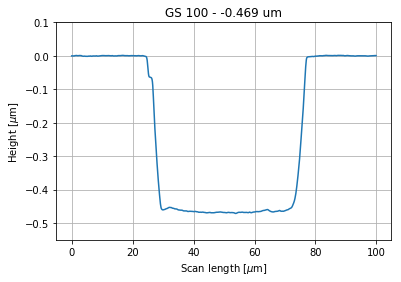

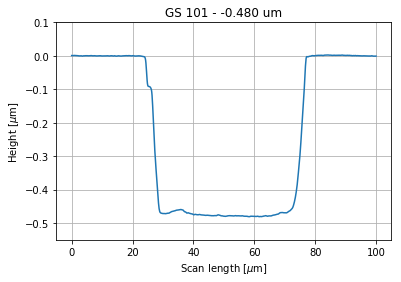

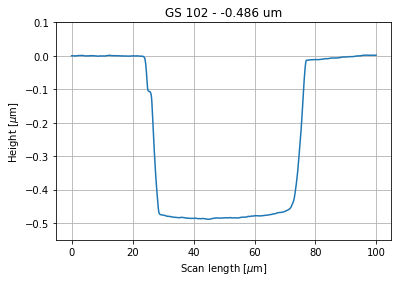

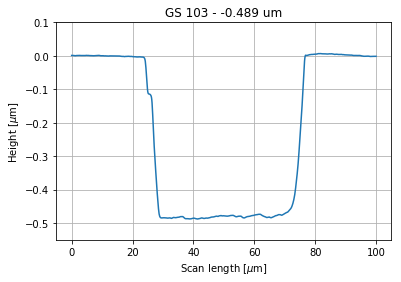

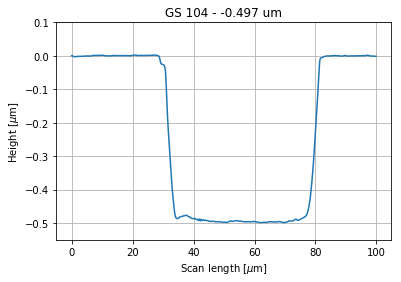

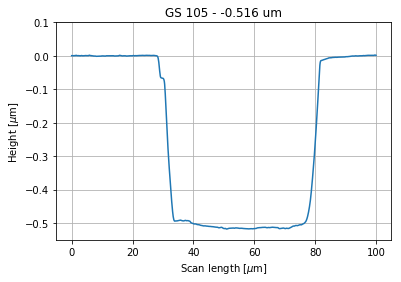

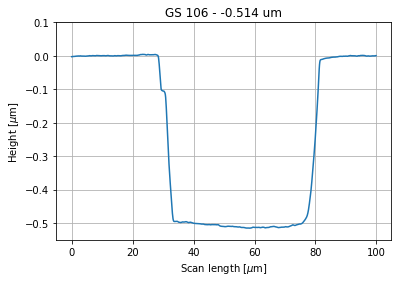

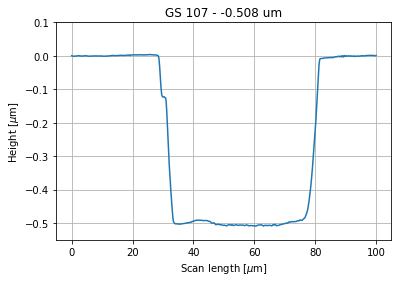

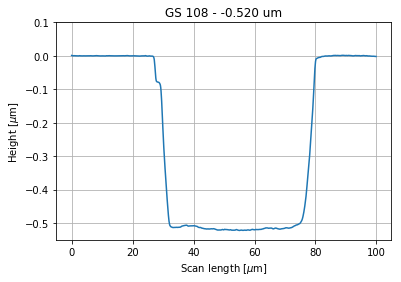

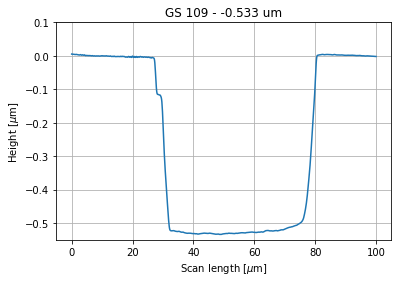

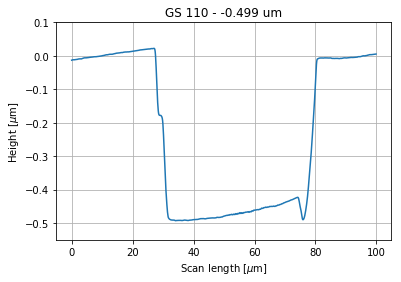

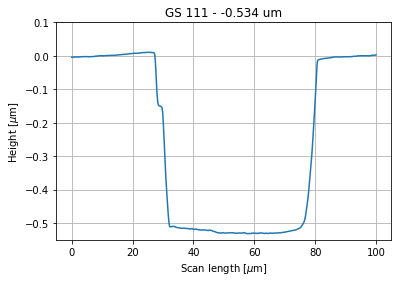

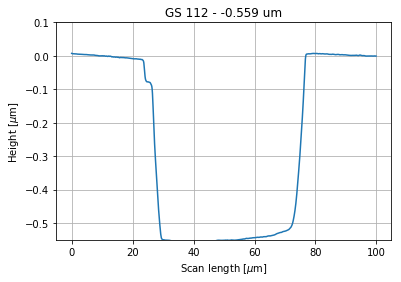

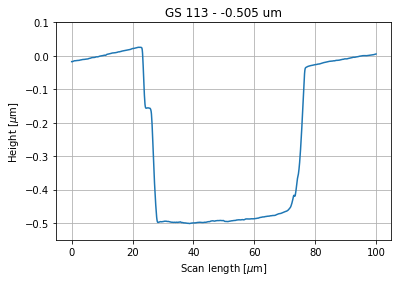

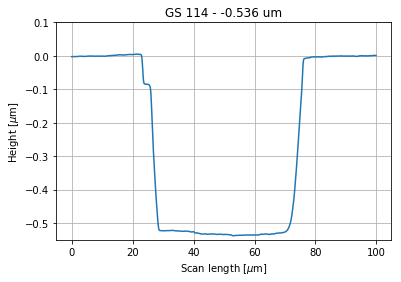

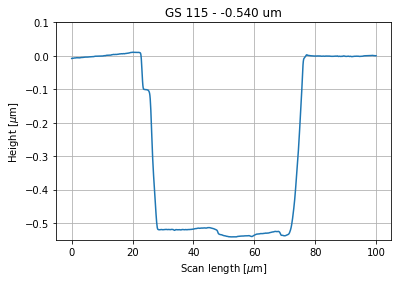

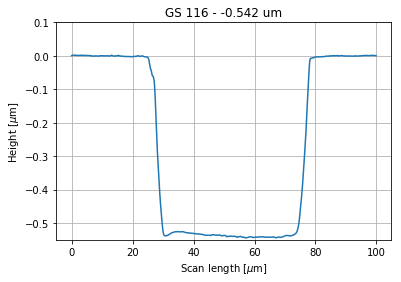

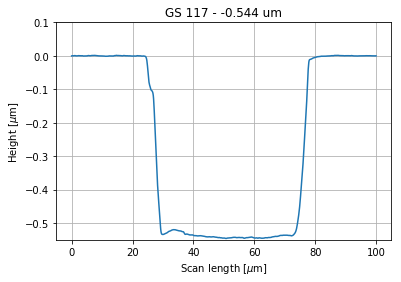

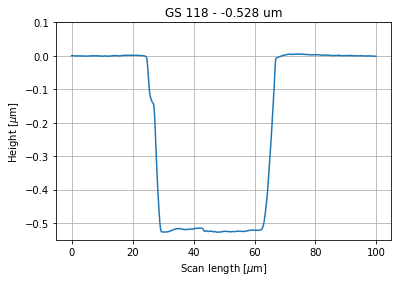

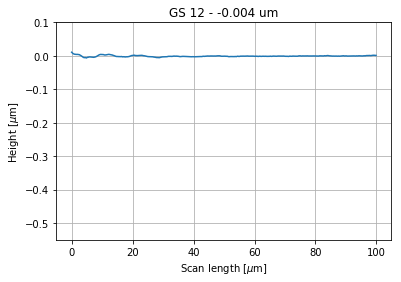

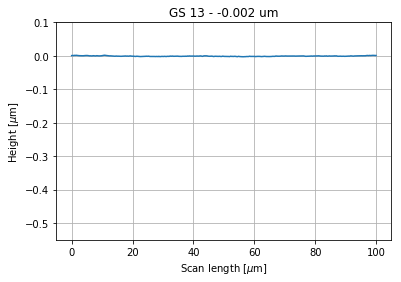

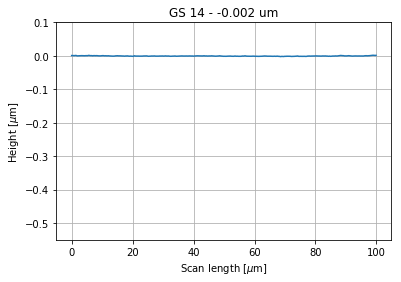

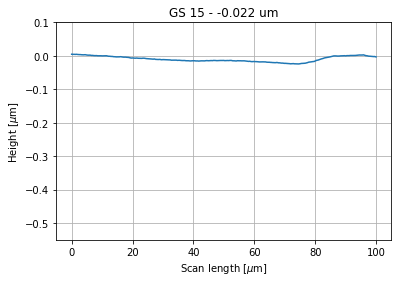

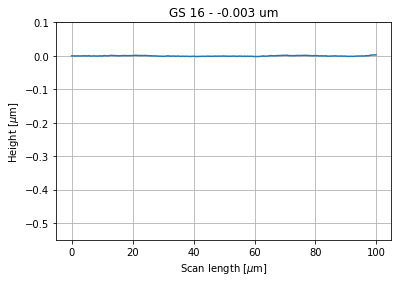

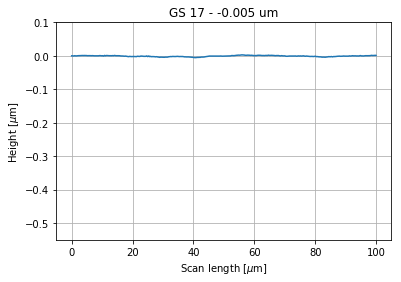

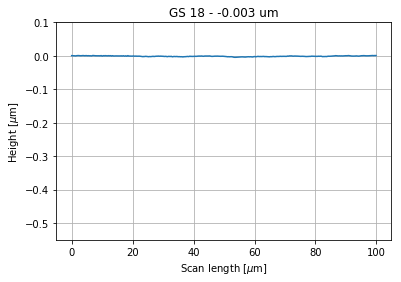

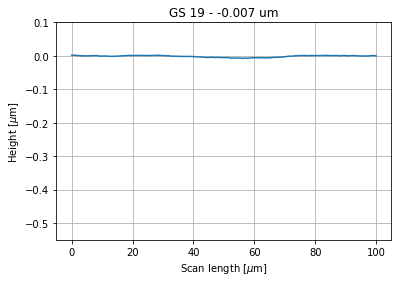

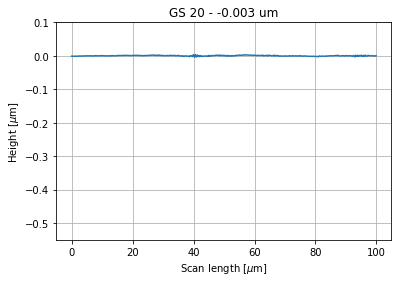

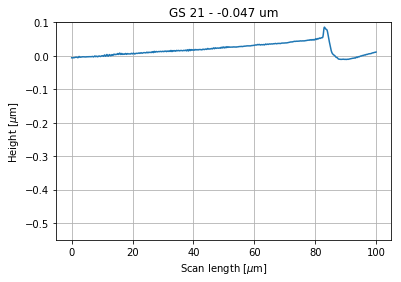

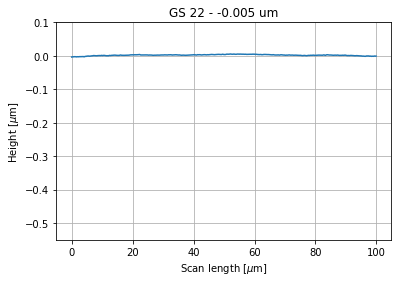

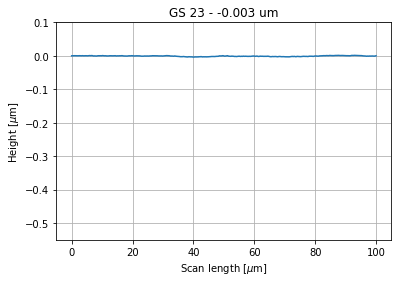

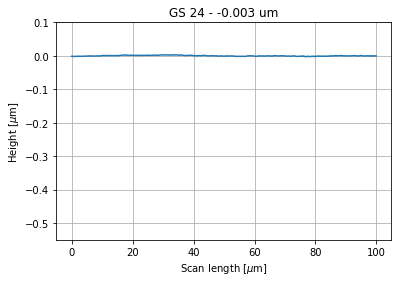

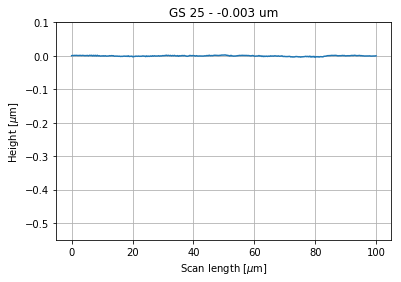

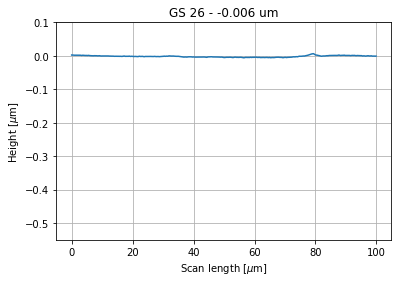

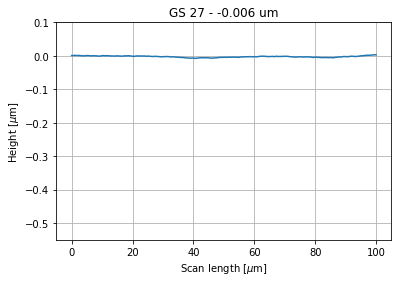

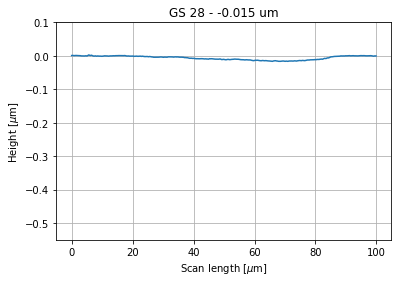

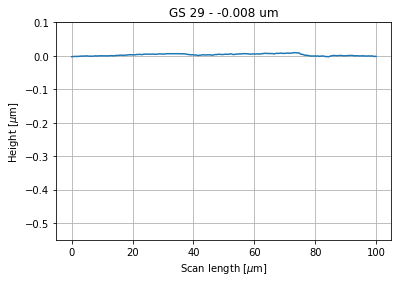

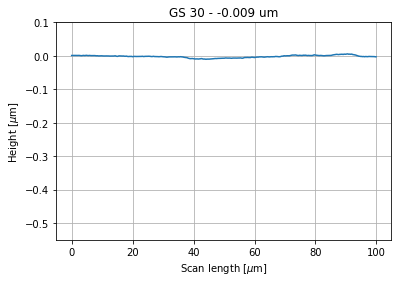

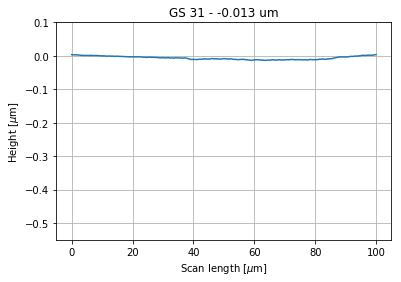

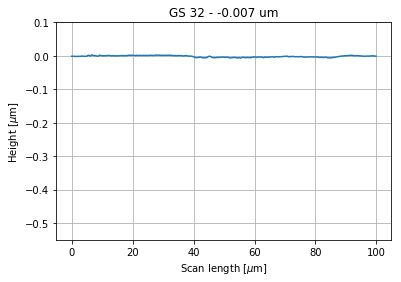

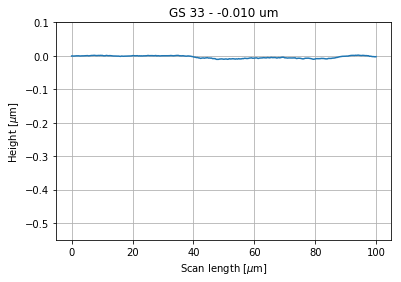

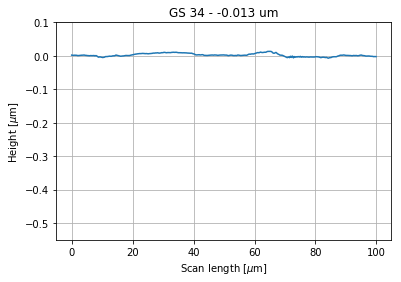

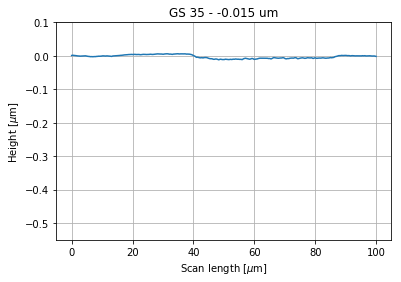

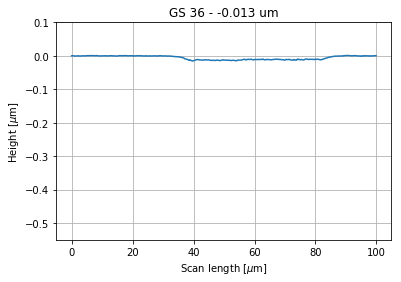

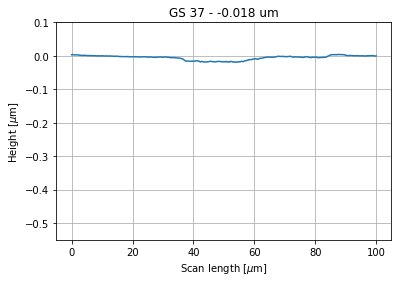

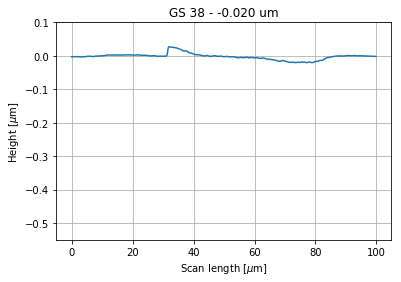

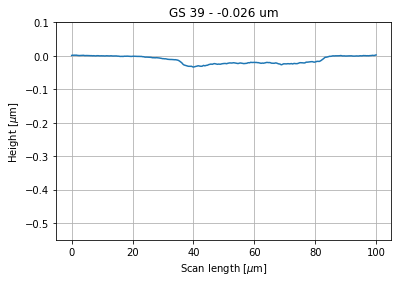

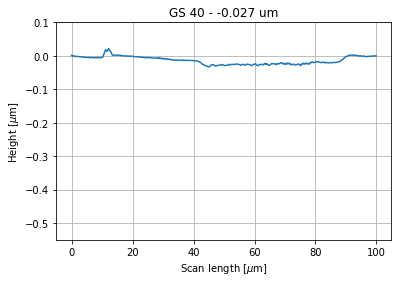

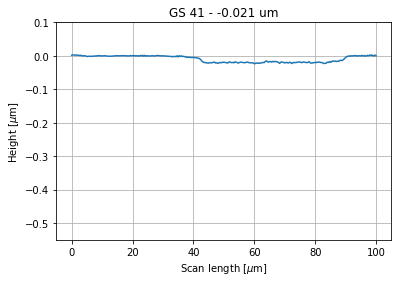

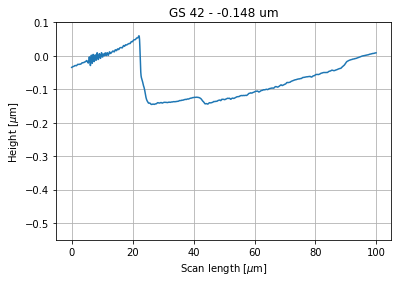

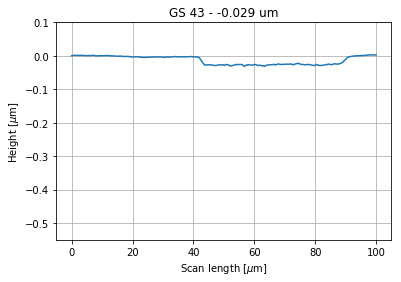

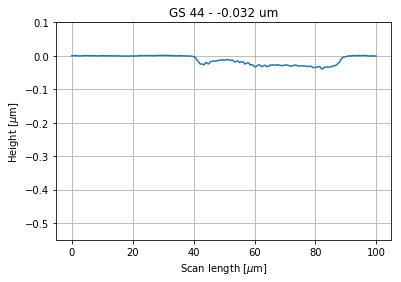

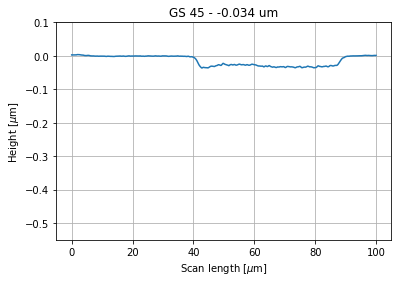

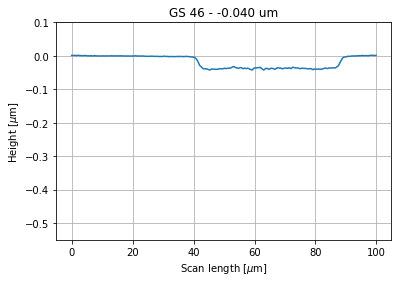

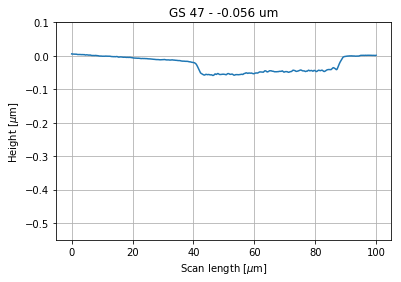

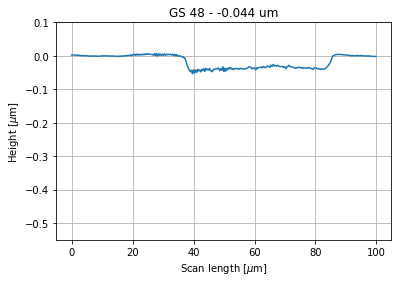

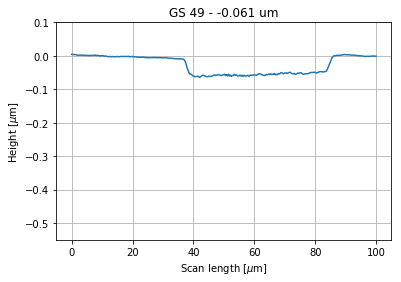

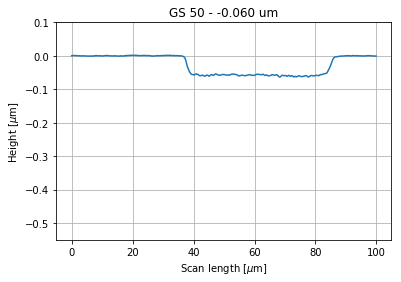

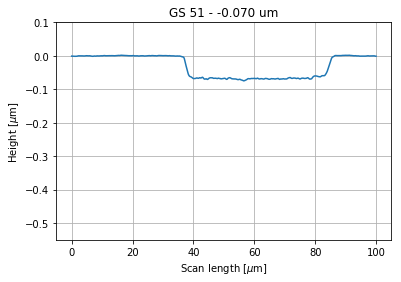

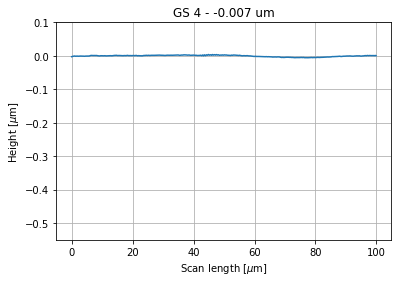

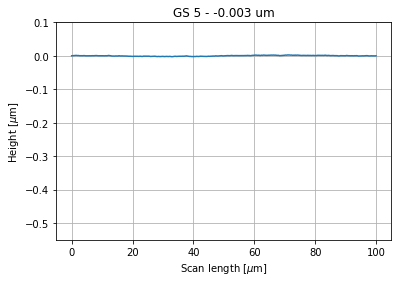

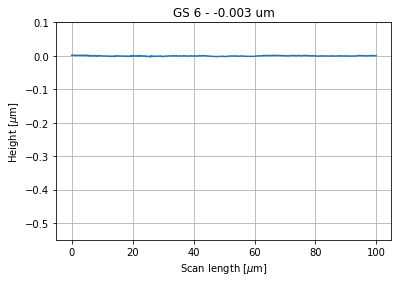

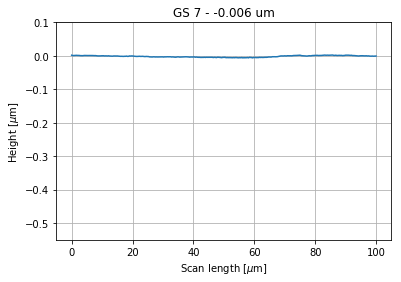

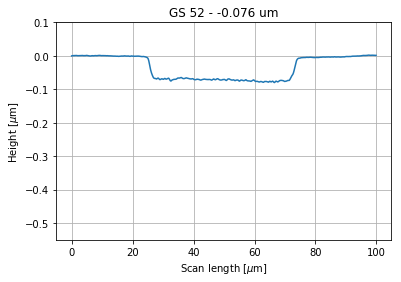

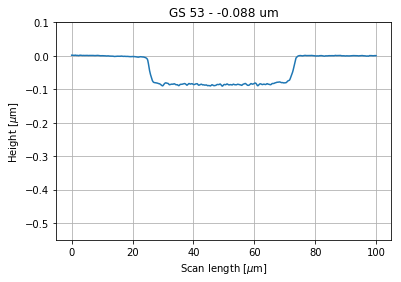

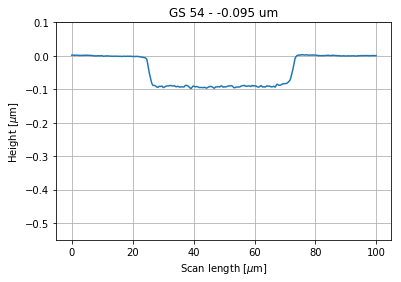

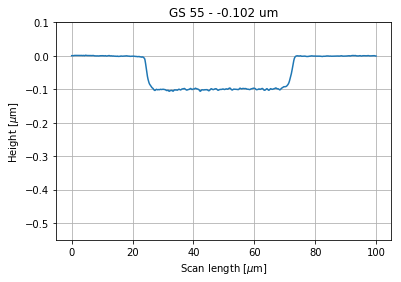

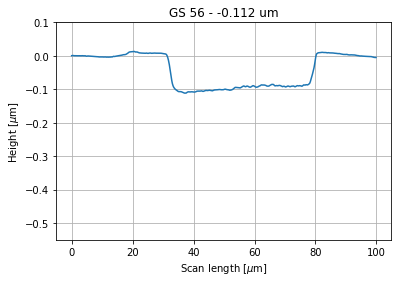

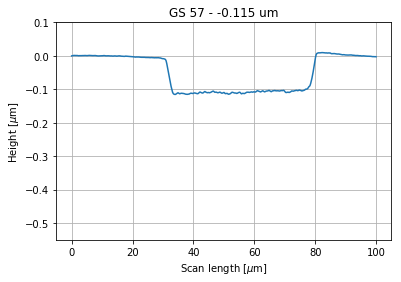

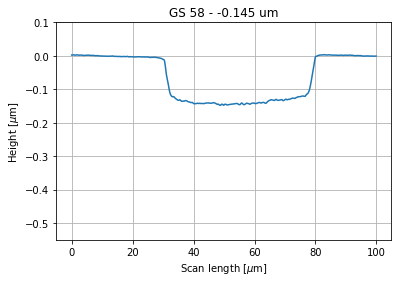

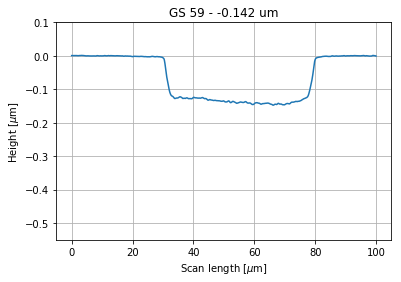

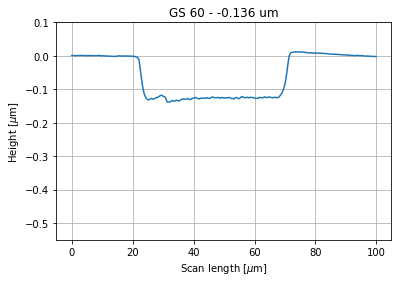

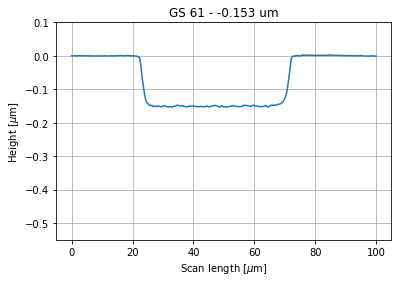

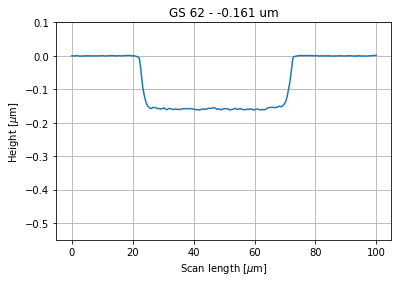

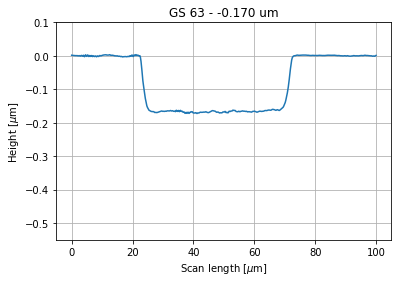

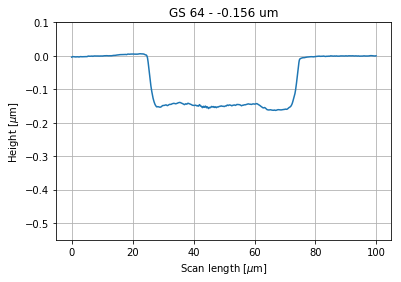

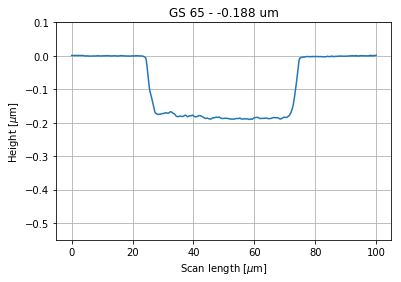

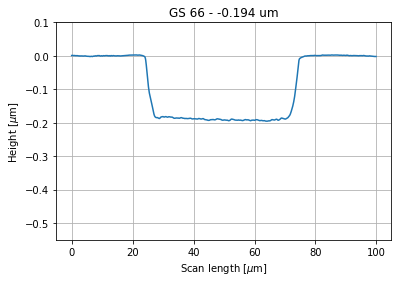

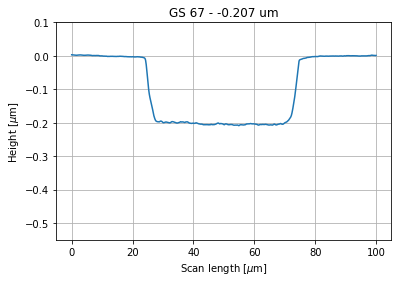

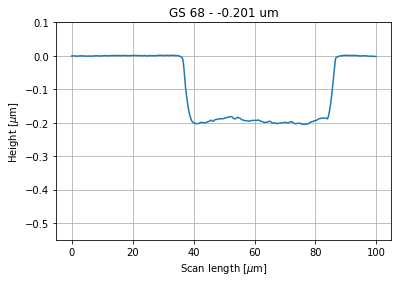

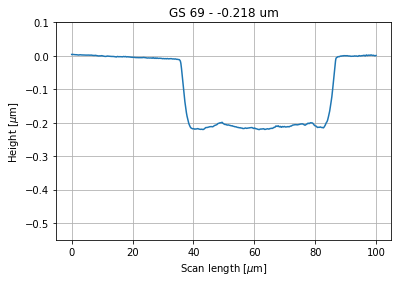

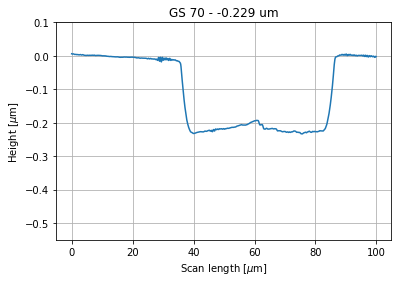

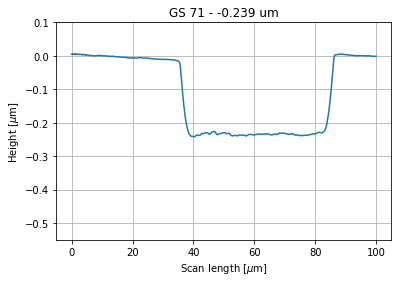

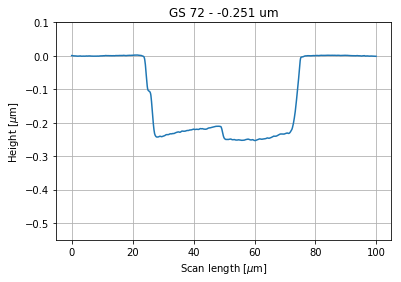

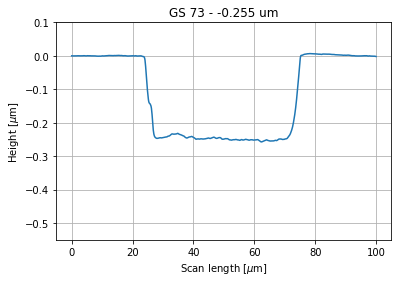

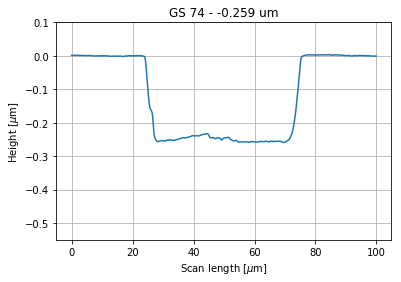

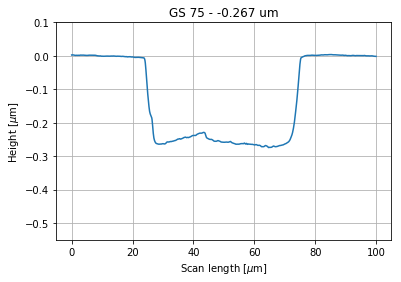

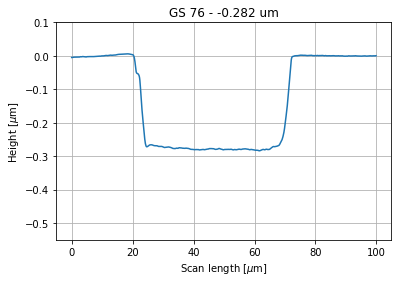

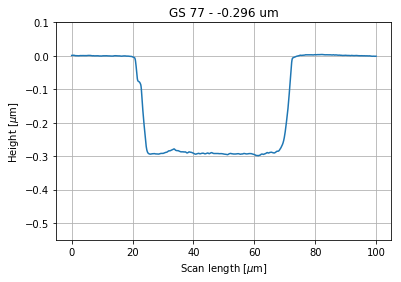

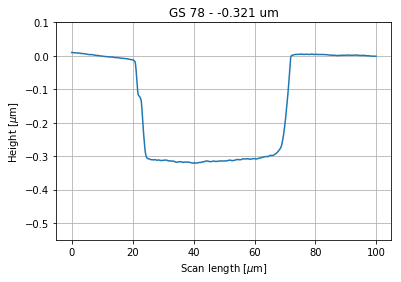

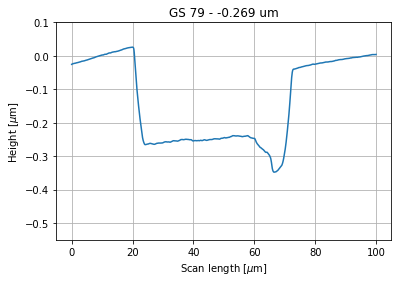

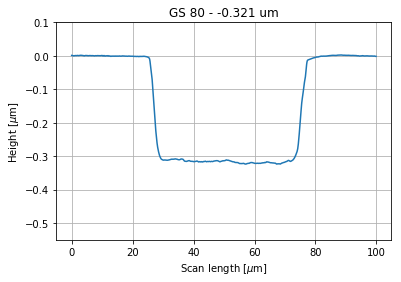

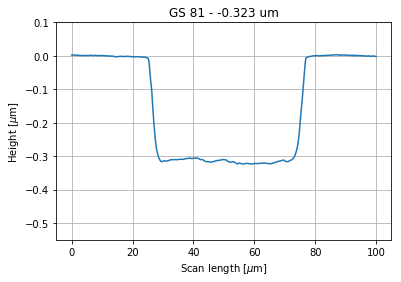

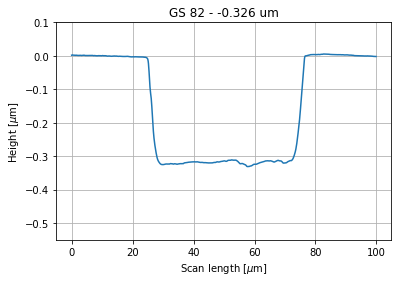

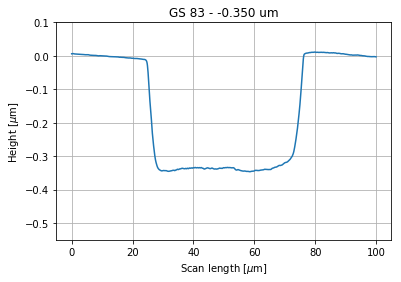

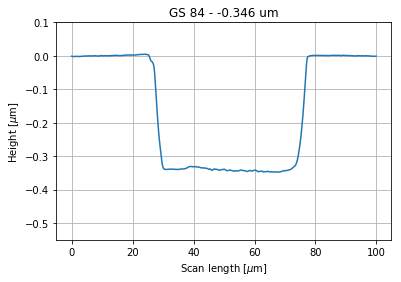

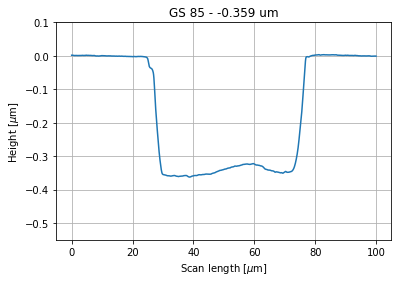

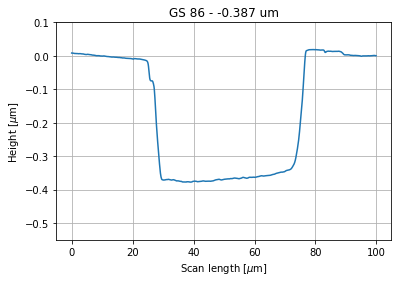

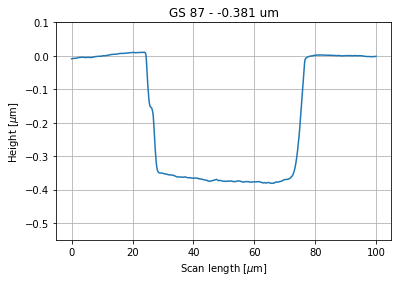

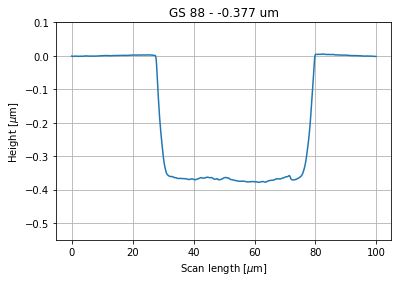

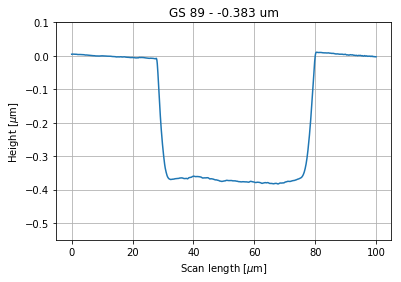

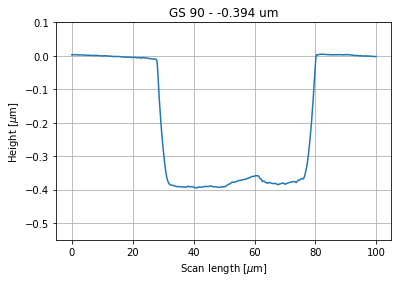

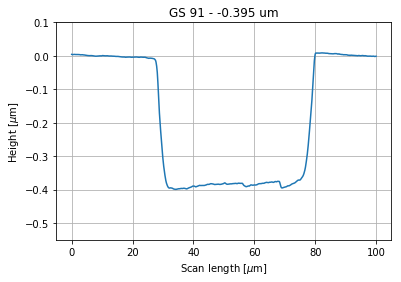

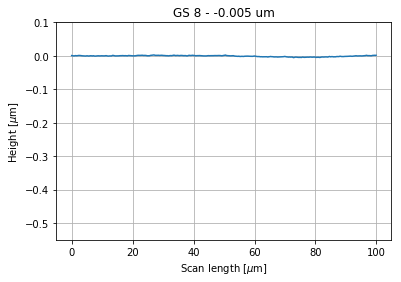

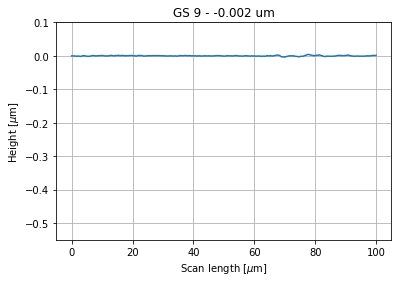

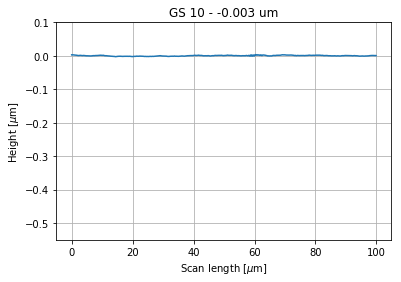

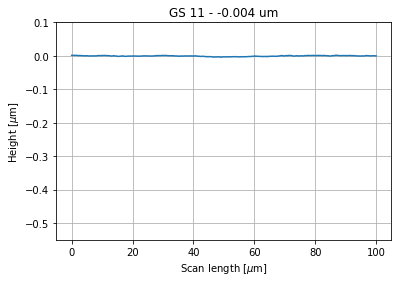

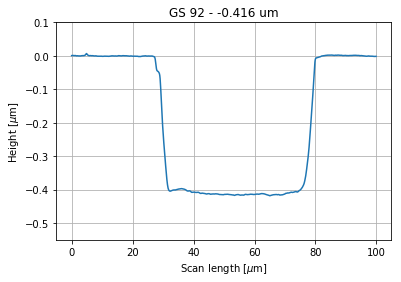

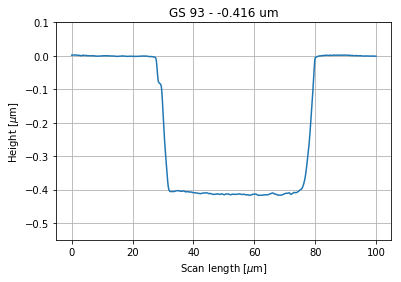

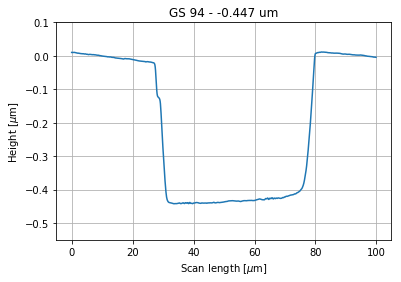

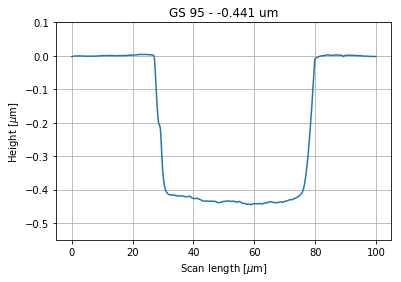

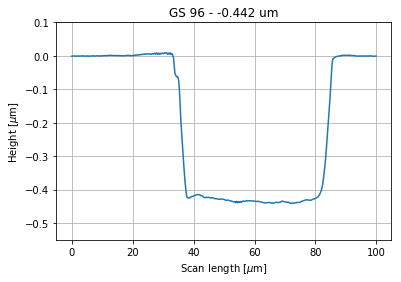

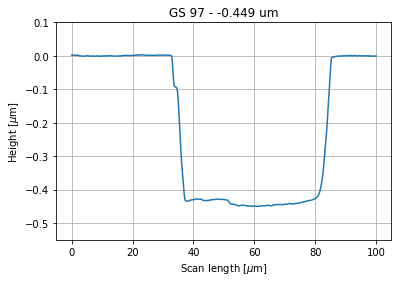

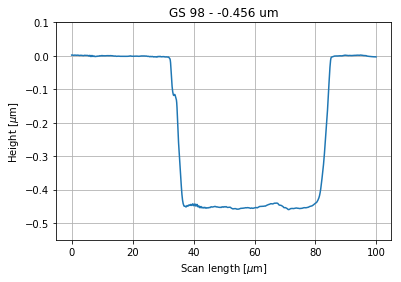

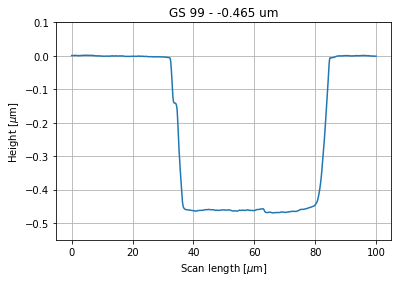

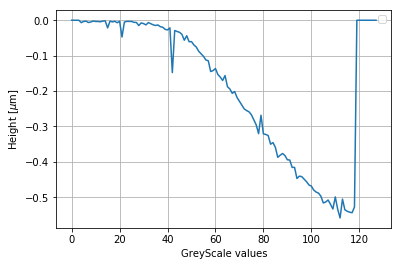

In [157]:
%matplotlib inline

#### FOR 4 depths per measurement
max_depths = 4
split_sections = [100,200,300]
surface_percentile = 90
bottom_percentile = 10
greyscales = np.zeros(128)

for file_i,file in enumerate(files):
    filename = os.path.join(root_dir, file)
#     print("Opening",filename)
    
    gs1, gs2 = file.split('.txt')[0].split('to')
    gs1 = np.int(gs1)
    gs2= np.int(gs2)
    gs1,gs2
    gslen = gs2-gs1
    
    if gslen >max_depths-1 :
        continue  
    gs_values = np.arange(gs1,gs2+1)
#     print('from',gs1,'to',gs2, gslen, gs_values)
    


        
    # Header points

    df_header = pd.read_csv(filename, sep='\s+',header=None, nrows=7 )
    df_header = df_header.T
    df_header.columns = df_header.iloc[0]
    df_header = df_header.reindex(df_header.index.drop(0))
    name = df_header.Data
    x_resolution = df_header['X-Resolution'].astype('float').values
    y_resolution = 0.0001
    x_coord = df_header['X-Coord'].values
    y_coord = df_header['Y-Coord'].values

#     print(name, x_resolution,x_coord, y_coord)


    df_header


    # Data points
    df = pd.read_csv(filename, sep='\s+',header=0, skiprows=7)

    x = np.arange(len(df.Intermediate))*x_resolution
#     print(x)
    y = df['Normal']*y_resolution
#     plt.plot(x, y, label=file_i)


    sections = [find_nearest_idx(x, val) for val in split_sections]
    x_divs = np.split(x, sections)
    y_divs = np.split(y, sections)
    
    
#     print(len(x_divs), x_divs)

    # INDIVIDUAL MEASUREMENTS
    for i,(x, y) in enumerate(zip(x_divs,y_divs)):
        if i > gslen:
            break
        x = x-x[0]
        gs = gs_values[i]
        
#         plt.plot(x, y, label=gs)

    # RELINEARIZE

        edge_thresholds = [20,90]
    #     plt.plot(x,y)

        sections = [find_nearest_idx(x, val) for val in edge_thresholds]
        x_edge = np.split(x, sections)
        y_edge = np.split(y, sections)

        x_edge = np.append(x_edge[0],x_edge[-1])
        y_edge = np.append(y_edge[0],y_edge[-1])


    #     plt.plot(x_edge, y_edge, '.')
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_edge,y_edge)

        y_lin = slope*x+intercept
#         plt.plot(x,y_lin,linestyle='--', lw=0.5)
        y_linearized = y-y_lin
        
        plt.figure()
        
        
        plt.plot(x,y_linearized)
        
        surface = np.percentile(y_linearized, surface_percentile)
        bottom = np.percentile(y_linearized, bottom_percentile)
        height = bottom-surface
        
        print(gs, "%0.3f"%surface, "%0.3f"%bottom, "%0.3f"%height)
        
        greyscales[gs] = height
    

        title = 'GS %d - %0.3f um'%(gs, height)
        plt.title(title)
        
        plt.xlabel('Scan length [$\mu$m]')
        plt.ylabel('Height [$\mu$m]')
        plt.ylim(-0.55,0.1)
        plt.grid('on')
        fig_filename = 'gs%d.png'%(gs)
        filename = os.path.join(root_dir, fig_filename)

        plt.savefig(filename)
        
    
gs_heights = greyscales
print(greyscales)

plt.figure()
gs_levels = np.arange(len(gs_heights))
plt.plot(gs_levels, gs_heights)
plt.grid('on')
plt.xlabel('GreyScale values')
plt.ylabel('Height [$\mu$m]')
fig_filename = 'gs_scale.png'
filename = os.path.join(root_dir, fig_filename)

plt.savefig(filename)
plt.legend()

#### 4 depths per measurement

100 0.001 -0.468 -0.469
101 0.001 -0.479 -0.480


C:\Users\daguiam264\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


102 0.000 -0.485 -0.486
103 0.004 -0.485 -0.489
104 0.001 -0.496 -0.497
105 0.001 -0.516 -0.516
106 0.001 -0.512 -0.514
107 0.002 -0.507 -0.508
108 0.000 -0.520 -0.520
109 0.003 -0.531 -0.533
110 0.011 -0.488 -0.499
111 0.004 -0.530 -0.534
112 0.005 -0.554 -0.559
113 0.008 -0.497 -0.505
114 0.001 -0.535 -0.536
115 0.002 -0.538 -0.540
116 0.001 -0.542 -0.542
117 0.000 -0.544 -0.544
118 0.003 -0.525 -0.528
12 0.001 -0.003 -0.004


C:\Users\daguiam264\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


13 0.000 -0.002 -0.002
14 0.000 -0.001 -0.002
15 0.001 -0.020 -0.022
16 0.001 -0.002 -0.003
17 0.001 -0.004 -0.005
18 0.000 -0.003 -0.003
19 0.001 -0.006 -0.007
20 0.002 -0.001 -0.003
21 0.044 -0.004 -0.047
22 0.004 -0.001 -0.005
23 0.000 -0.003 -0.003
24 0.002 -0.001 -0.003
25 0.001 -0.002 -0.003
26 0.001 -0.005 -0.006
27 0.000 -0.006 -0.006
28 0.000 -0.015 -0.015
29 0.007 -0.001 -0.008
30 0.002 -0.008 -0.009
31 0.001 -0.012 -0.013
32 0.001 -0.005 -0.007
33 0.001 -0.009 -0.010
34 0.009 -0.004 -0.013
35 0.005 -0.010 -0.015
36 0.000 -0.013 -0.013
37 0.001 -0.017 -0.018
38 0.003 -0.016 -0.020
39 0.000 -0.025 -0.026
40 0.000 -0.027 -0.027
41 0.000 -0.021 -0.021
42 0.009 -0.139 -0.148
43 0.001 -0.028 -0.029
44 0.001 -0.031 -0.032
45 0.001 -0.033 -0.034
46 0.000 -0.039 -0.040
47 0.001 -0.055 -0.056
48 0.004 -0.040 -0.044
49 0.002 -0.059 -0.061
50 0.001 -0.060 -0.060
51 0.001 -0.069 -0.070
4 0.002 -0.005 -0.007
5 0.002 -0.002 -0.003
6 0.001 -0.002 -0.003
7 0.001 -0.005 -0.006
52 0.001 -0.075

No handles with labels found to put in legend.


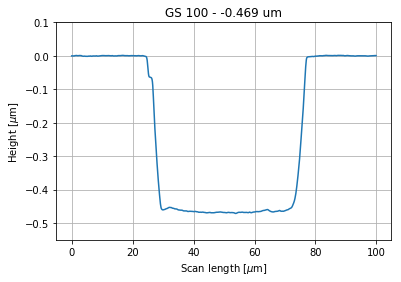

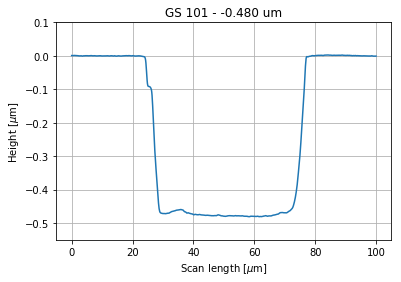

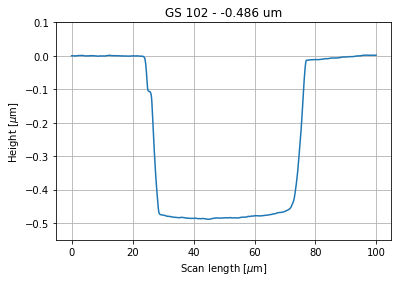

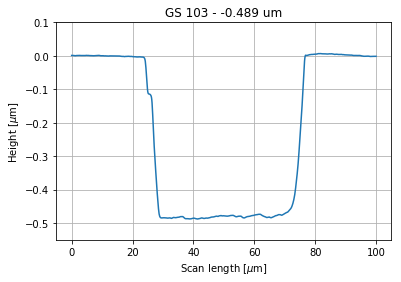

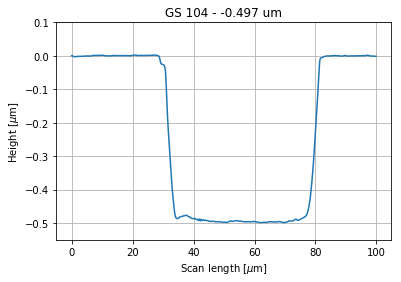

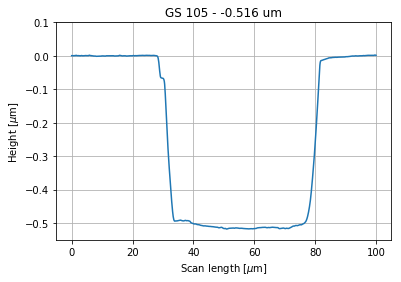

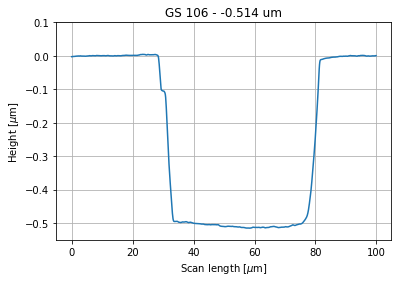

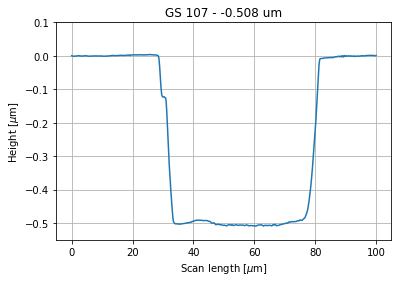

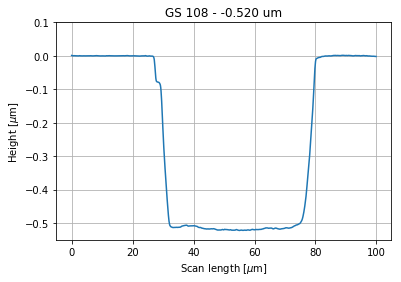

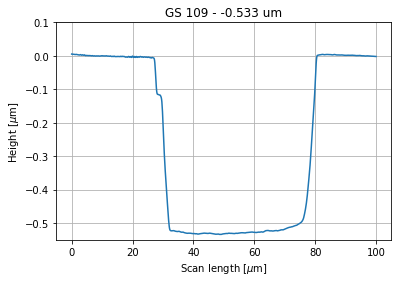

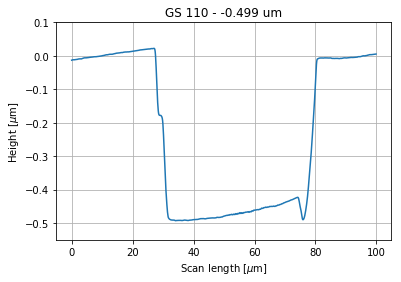

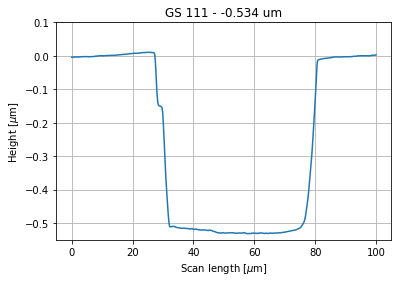

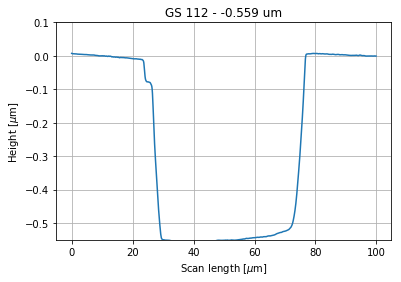

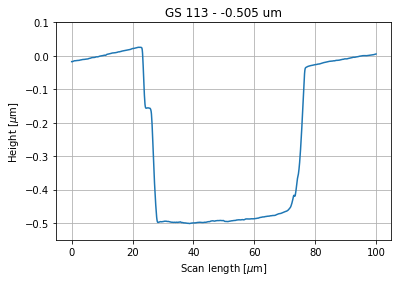

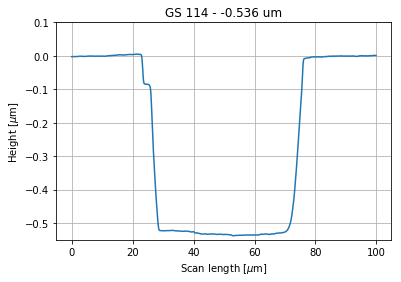

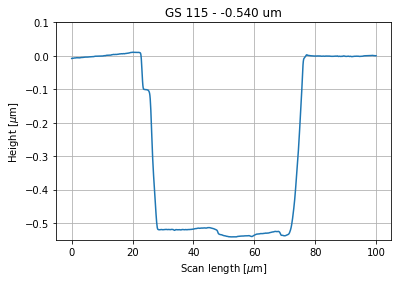

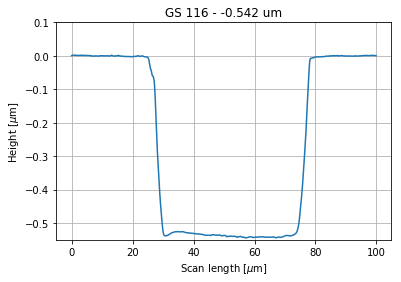

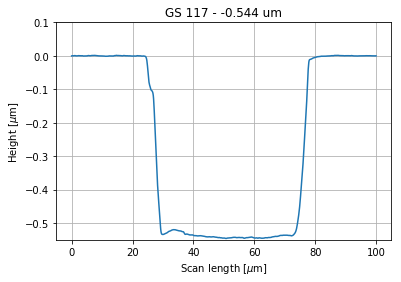

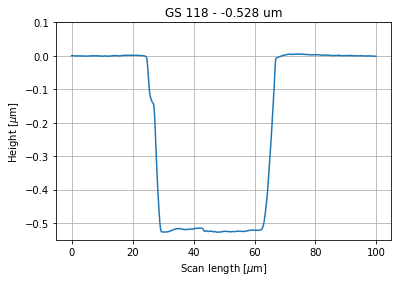

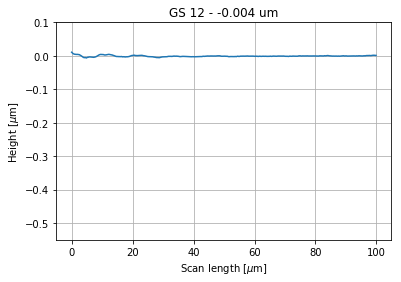

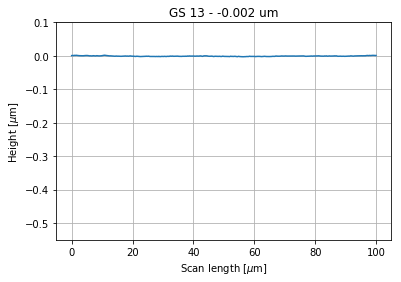

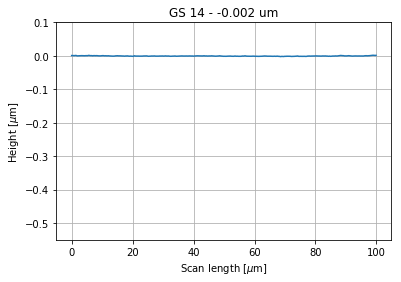

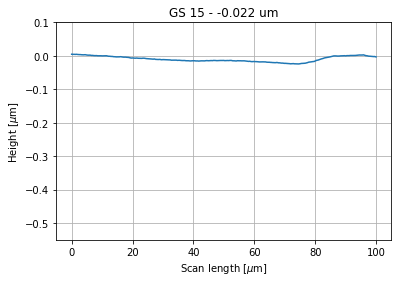

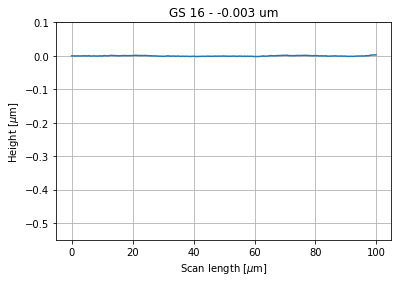

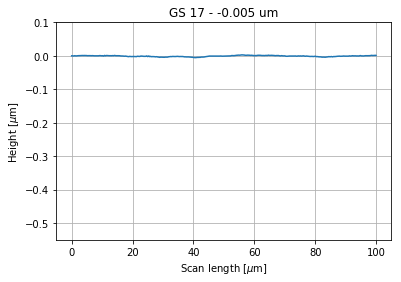

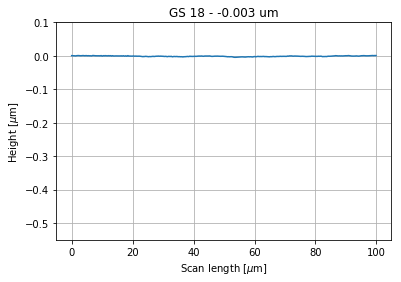

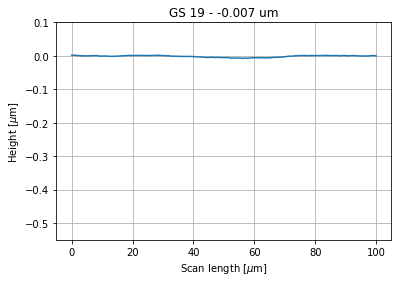

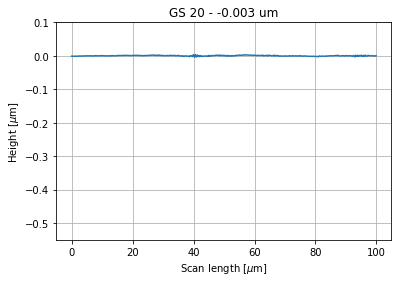

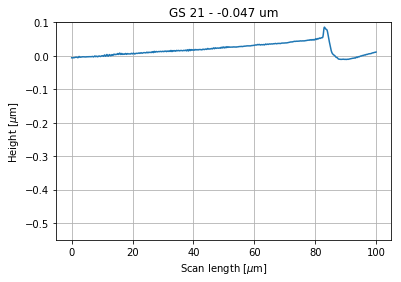

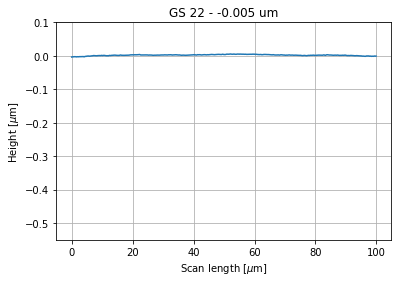

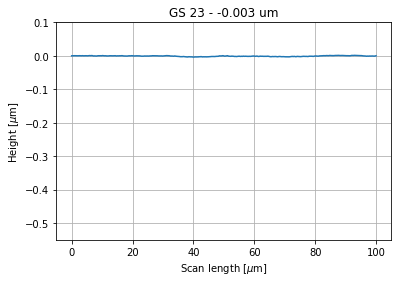

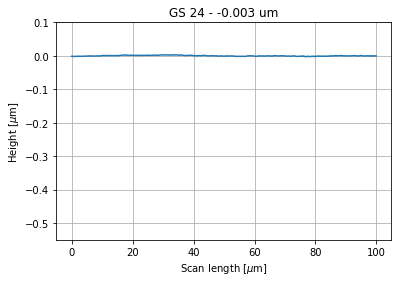

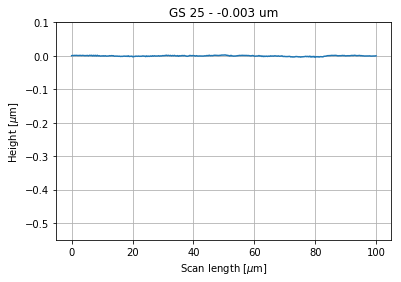

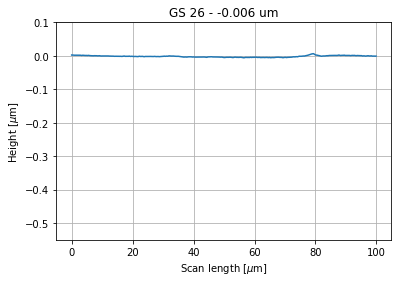

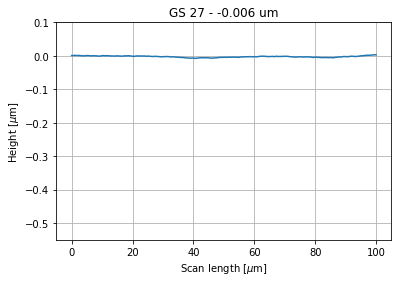

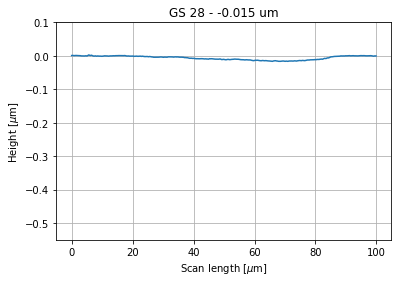

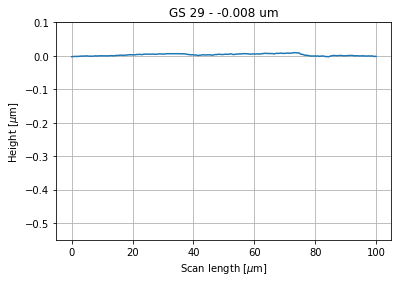

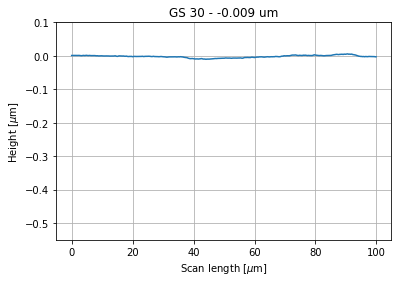

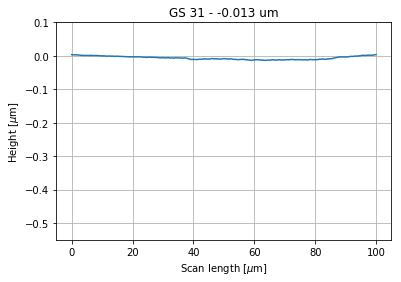

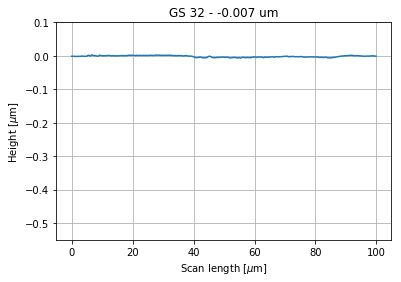

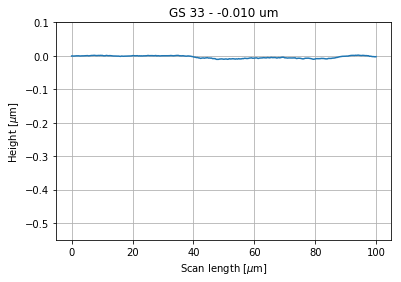

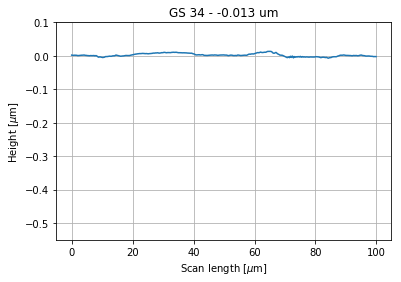

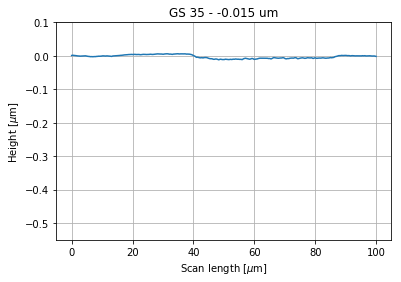

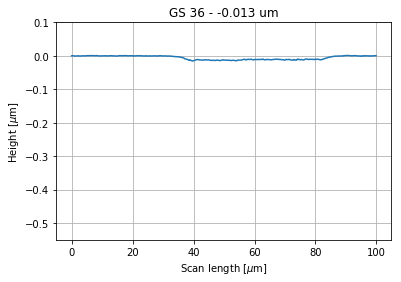

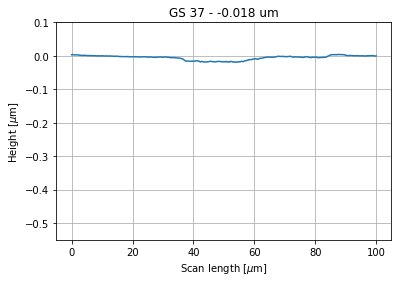

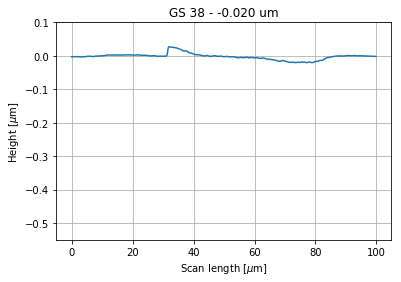

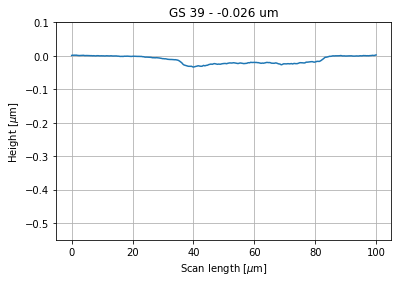

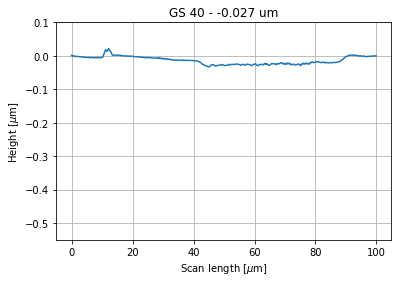

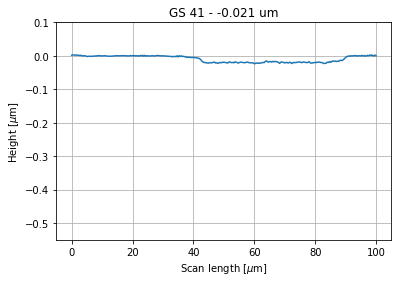

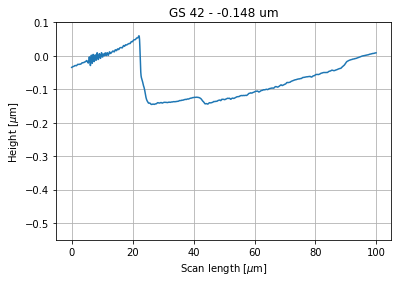

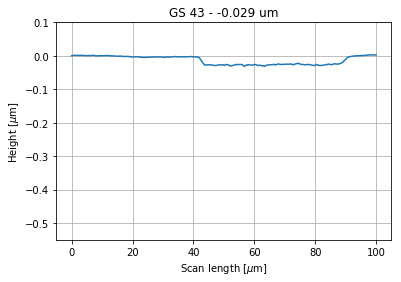

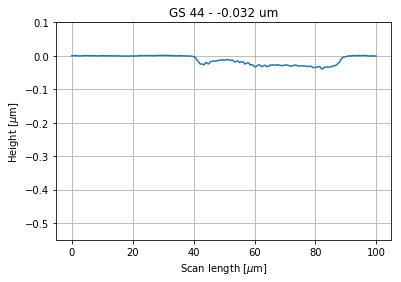

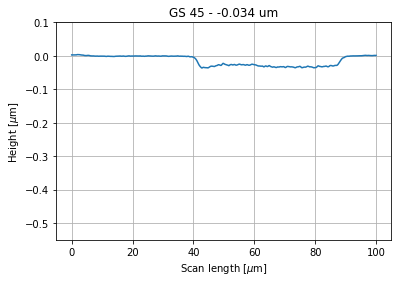

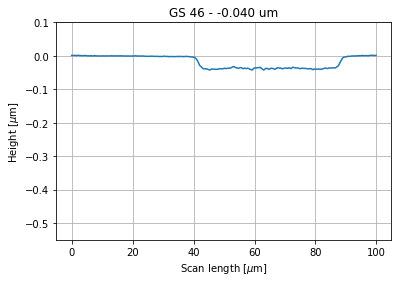

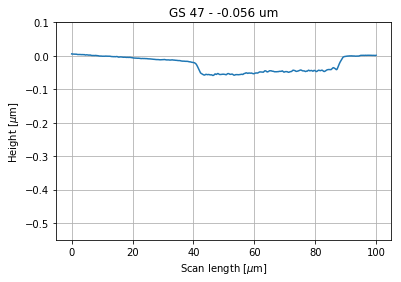

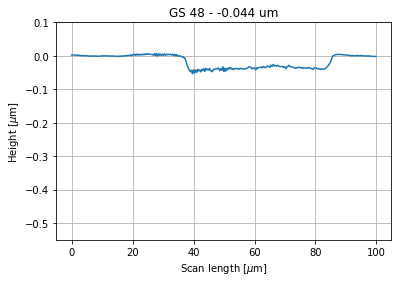

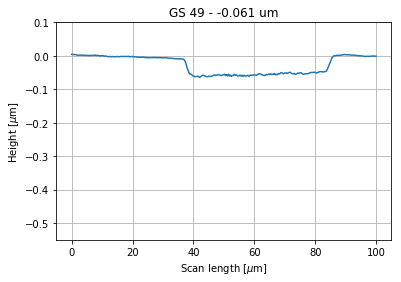

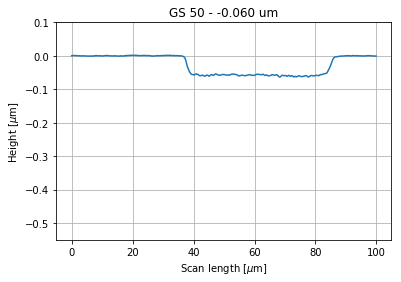

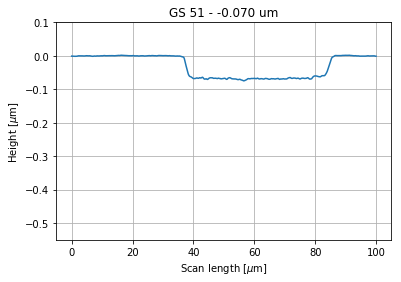

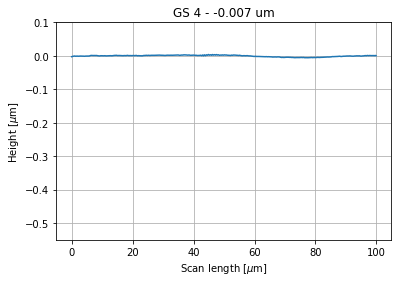

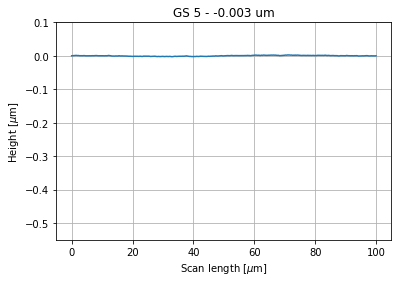

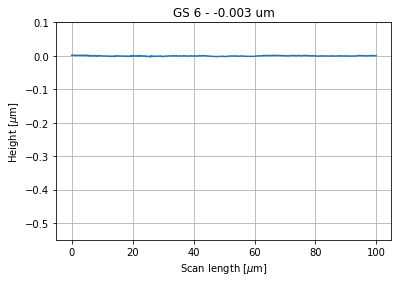

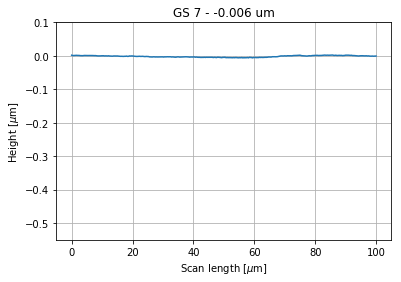

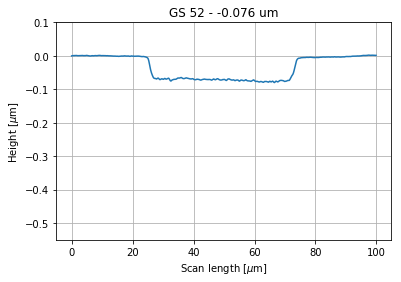

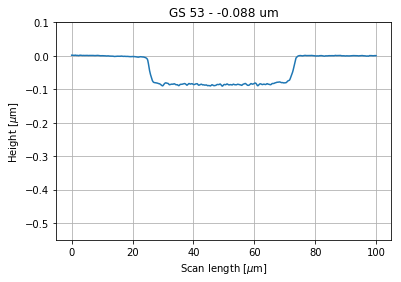

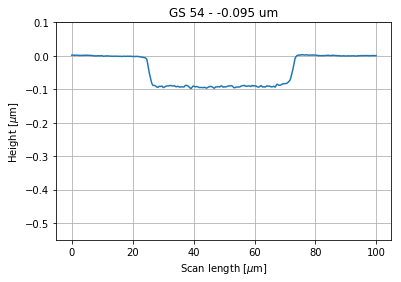

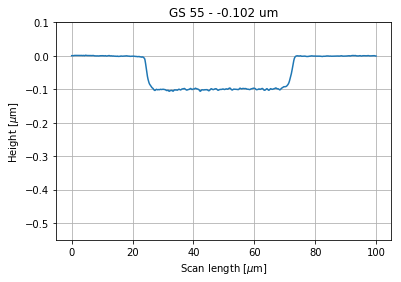

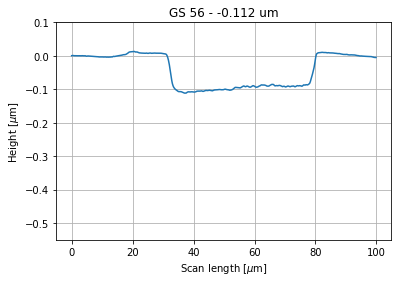

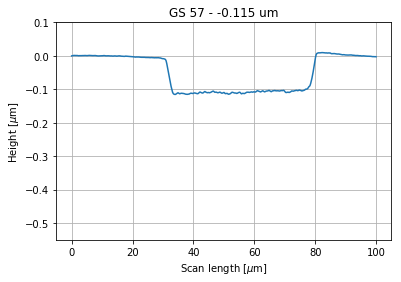

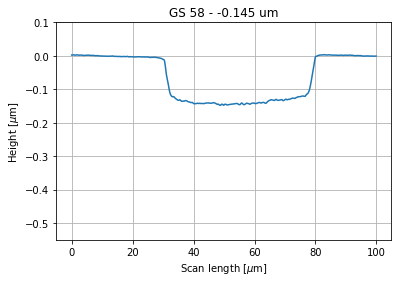

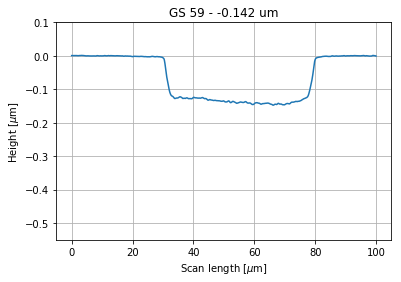

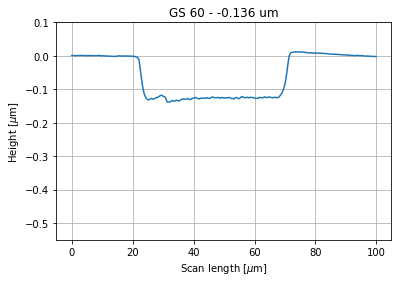

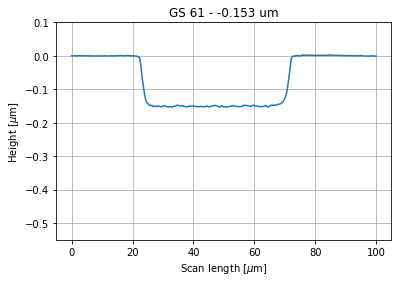

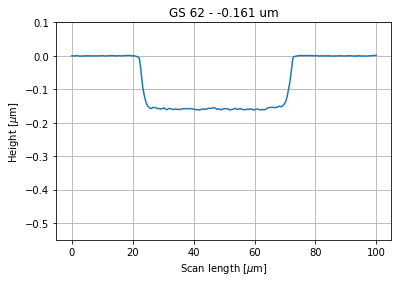

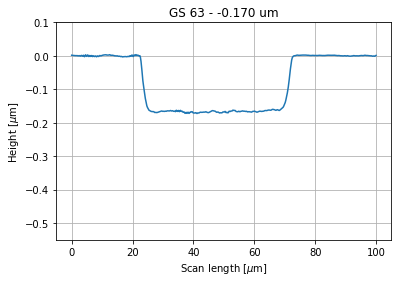

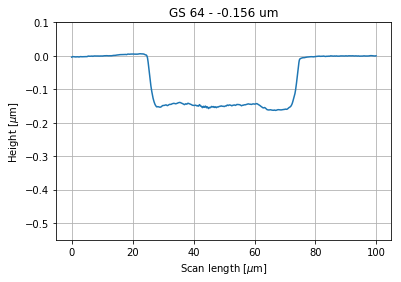

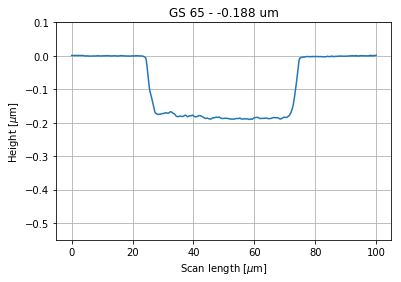

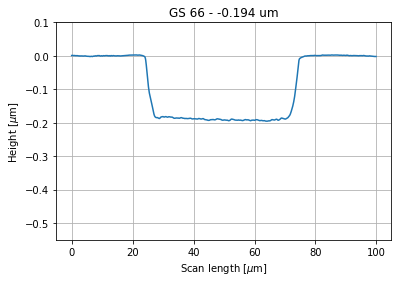

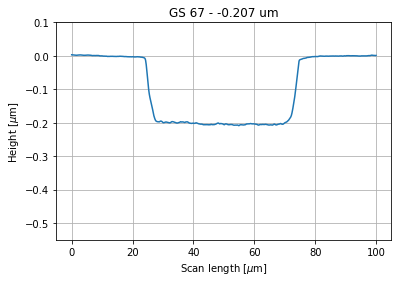

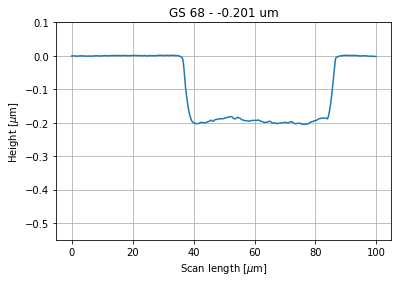

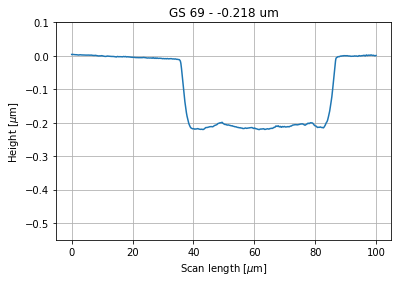

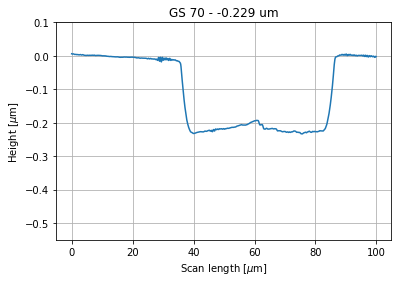

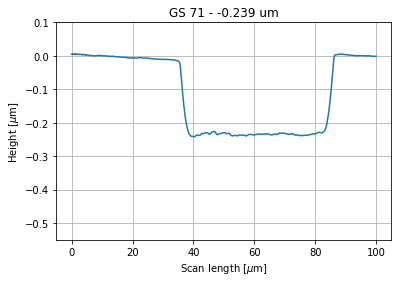

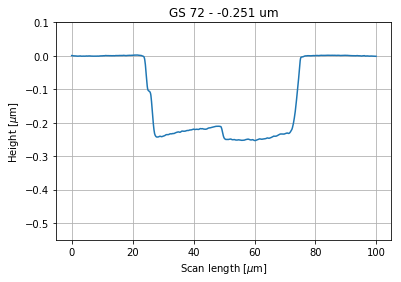

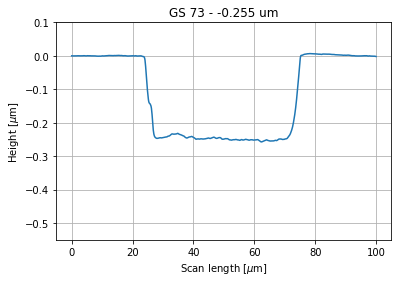

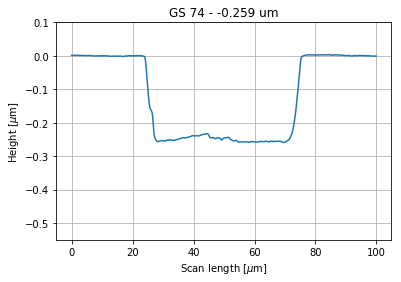

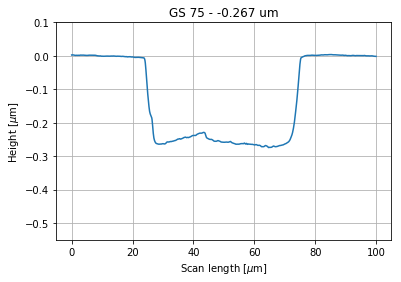

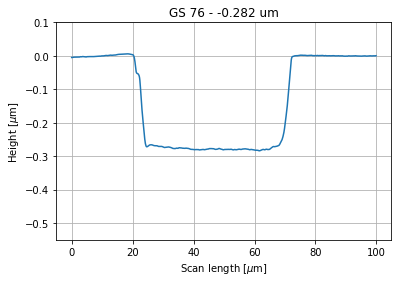

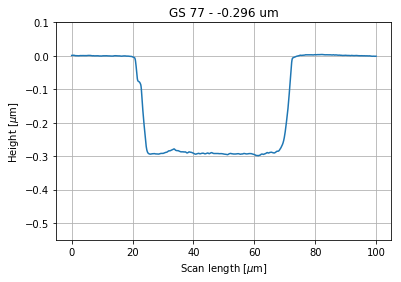

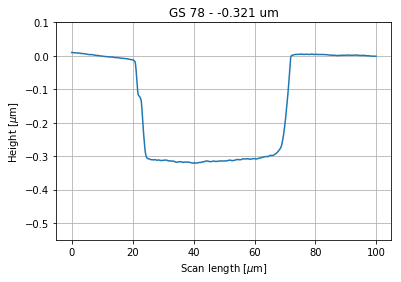

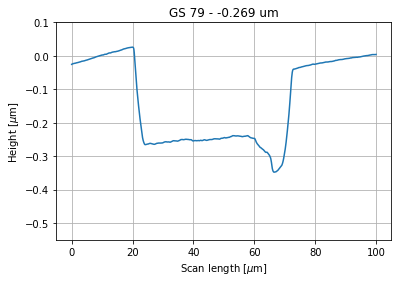

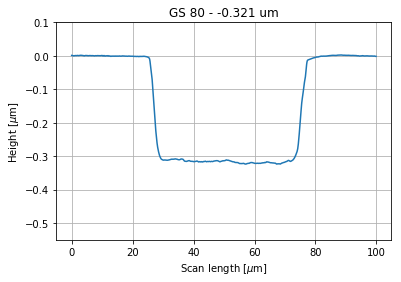

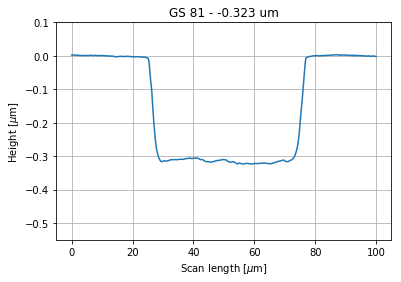

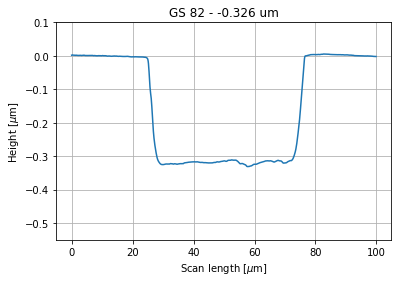

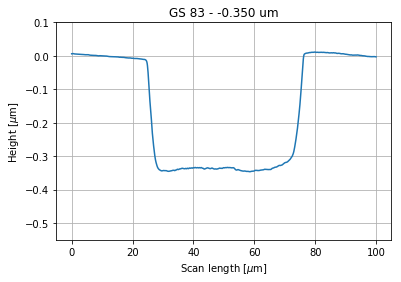

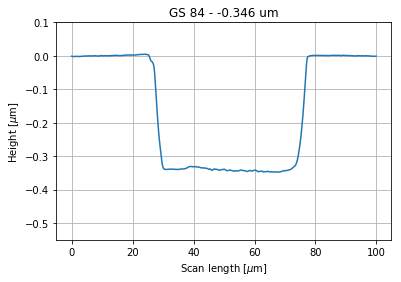

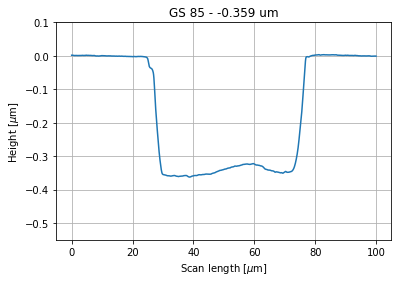

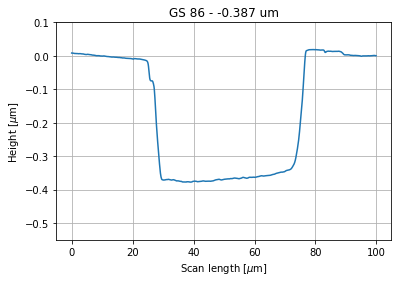

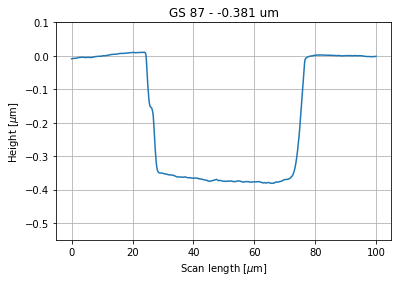

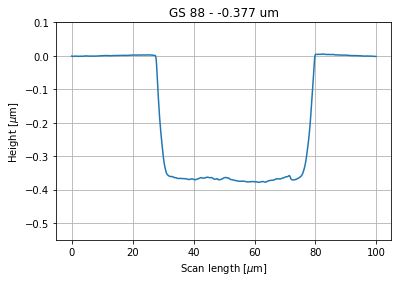

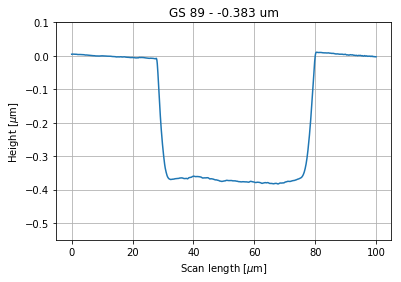

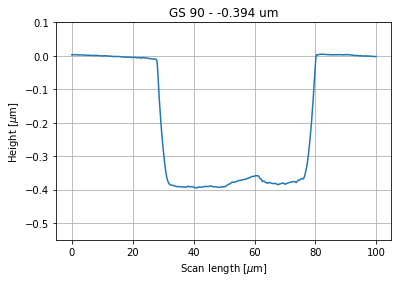

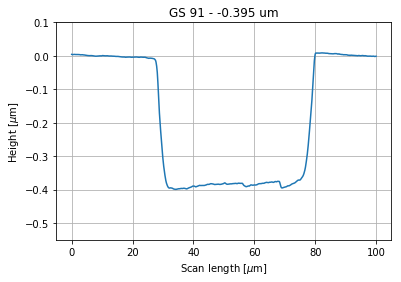

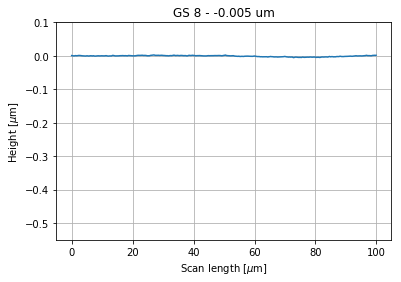

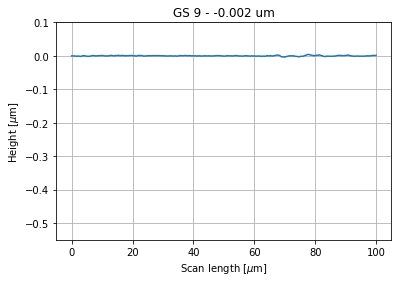

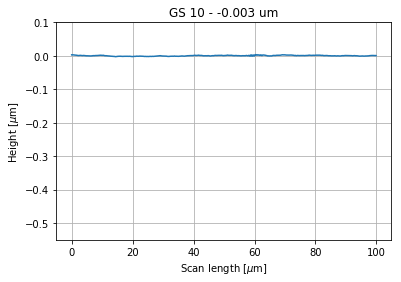

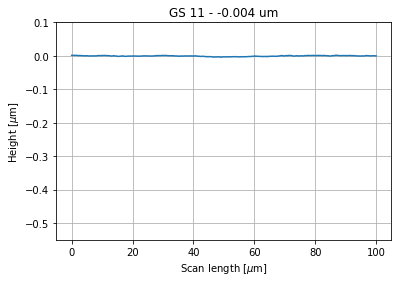

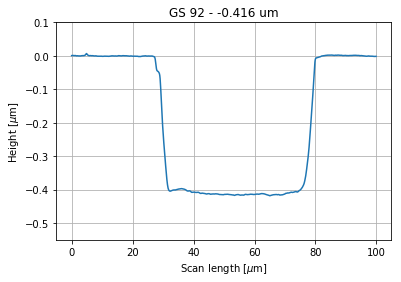

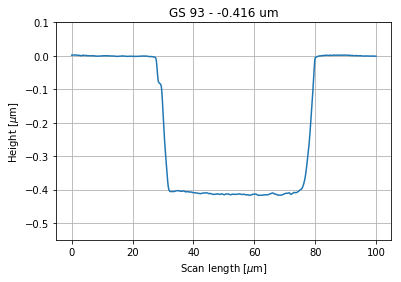

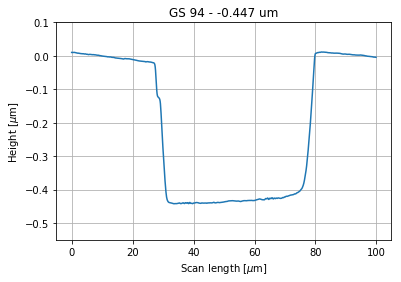

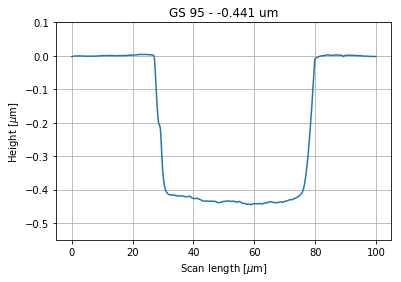

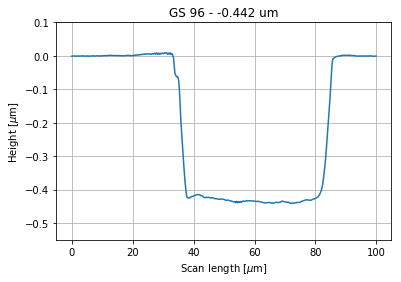

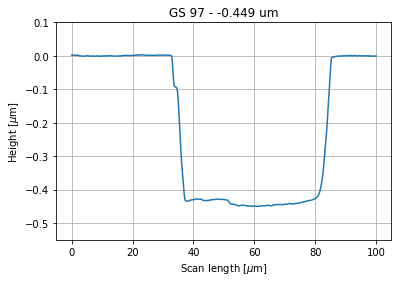

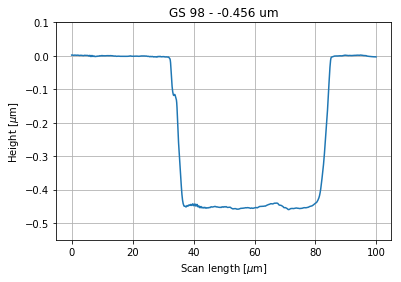

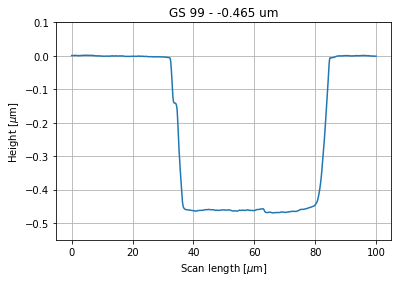

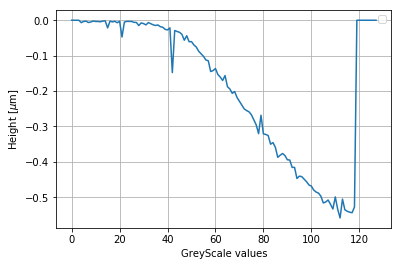

In [157]:
%matplotlib inline

#### FOR 4 depths per measurement
max_depths = 4
split_sections = [100,200,300]
surface_percentile = 90
bottom_percentile = 10
greyscales = np.zeros(128)

for file_i,file in enumerate(files):
    filename = os.path.join(root_dir, file)
#     print("Opening",filename)
    
    gs1, gs2 = file.split('.txt')[0].split('to')
    gs1 = np.int(gs1)
    gs2= np.int(gs2)
    gs1,gs2
    gslen = gs2-gs1
    
    if gslen >max_depths-1 :
        continue  
    gs_values = np.arange(gs1,gs2+1)
#     print('from',gs1,'to',gs2, gslen, gs_values)
    


        
    # Header points

    df_header = pd.read_csv(filename, sep='\s+',header=None, nrows=7 )
    df_header = df_header.T
    df_header.columns = df_header.iloc[0]
    df_header = df_header.reindex(df_header.index.drop(0))
    name = df_header.Data
    x_resolution = df_header['X-Resolution'].astype('float').values
    y_resolution = 0.0001
    x_coord = df_header['X-Coord'].values
    y_coord = df_header['Y-Coord'].values

#     print(name, x_resolution,x_coord, y_coord)


    df_header


    # Data points
    df = pd.read_csv(filename, sep='\s+',header=0, skiprows=7)

    x = np.arange(len(df.Intermediate))*x_resolution
#     print(x)
    y = df['Normal']*y_resolution
#     plt.plot(x, y, label=file_i)


    sections = [find_nearest_idx(x, val) for val in split_sections]
    x_divs = np.split(x, sections)
    y_divs = np.split(y, sections)
    
    
#     print(len(x_divs), x_divs)

    # INDIVIDUAL MEASUREMENTS
    for i,(x, y) in enumerate(zip(x_divs,y_divs)):
        if i > gslen:
            break
        x = x-x[0]
        gs = gs_values[i]
        
#         plt.plot(x, y, label=gs)

    # RELINEARIZE

        edge_thresholds = [20,90]
    #     plt.plot(x,y)

        sections = [find_nearest_idx(x, val) for val in edge_thresholds]
        x_edge = np.split(x, sections)
        y_edge = np.split(y, sections)

        x_edge = np.append(x_edge[0],x_edge[-1])
        y_edge = np.append(y_edge[0],y_edge[-1])


    #     plt.plot(x_edge, y_edge, '.')
        slope, intercept, r_value, p_value, std_err = stats.linregress(x_edge,y_edge)

        y_lin = slope*x+intercept
#         plt.plot(x,y_lin,linestyle='--', lw=0.5)
        y_linearized = y-y_lin
        
        plt.figure()
        
        
        plt.plot(x,y_linearized)
        
        surface = np.percentile(y_linearized, surface_percentile)
        bottom = np.percentile(y_linearized, bottom_percentile)
        height = bottom-surface
        
        print(gs, "%0.3f"%surface, "%0.3f"%bottom, "%0.3f"%height)
        
        greyscales[gs] = height
    

        title = 'GS %d - %0.3f um'%(gs, height)
        plt.title(title)
        
        plt.xlabel('Scan length [$\mu$m]')
        plt.ylabel('Height [$\mu$m]')
        plt.ylim(-0.55,0.1)
        plt.grid('on')
        fig_filename = 'gs%d.png'%(gs)
        filename = os.path.join(root_dir, fig_filename)

        plt.savefig(filename)
        
    
gs_heights = greyscales
print(greyscales)

plt.figure()
gs_levels = np.arange(len(gs_heights))
plt.plot(gs_levels, gs_heights)
plt.grid('on')
plt.xlabel('GreyScale values')
plt.ylabel('Height [$\mu$m]')
fig_filename = 'gs_scale.png'
filename = os.path.join(root_dir, fig_filename)

plt.savefig(filename)
plt.legend()

In [158]:
greyscale_calibration = np.array([gs_levels, gs_heights]).T

gs_filename = 'greyscale_calibration.txt'
filename = os.path.join(root_dir, gs_filename)
header = 'Grayscale level, step height [um]'
np.savetxt(filename, greyscale_calibration, delimiter=',', fmt='%d,%0.4f', header=header) 

(-0.02, 0.033389529699590345)

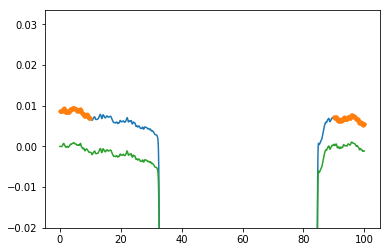

In [129]:
%matplotlib inline
# BY LIENAR REGRESSION OF EDGES


edge_thresholds = [10,90]
plt.plot(x,y)

sections = [find_nearest_idx(x, val) for val in edge_thresholds]
x_edge = np.split(x, sections)
y_edge = np.split(y, sections)

x_edge = np.append(x_edge[0],x_edge[-1])
y_edge = np.append(y_edge[0],y_edge[-1])

# print(x_edge[0,2])
# x_edge = np.append(np.split(x, sections)[0,2])
# y_edge = np.append(np.split(y, sections)[0,2])

plt.plot(x_edge, y_edge, '.')

slope, intercept, r_value, p_value, std_err = stats.linregress(x_edge,y_edge)

y_lin = slope*x+intercept
# plt.plot(x,y_lin)
plt.plot(x,y-y_lin)

# x[x>np.percentile(y,90)]
# [y>np.percentile(y,80)]
plt.ylim(ymin=-0.02)

In [117]:
x_edge

array([0.      , 0.100781, 0.201562, 0.302343, 0.403124, 0.503905,
       0.604686, 0.705467, 0.806248, 0.907029, 1.00781 , 1.108591,
       1.209372, 1.310153, 1.410934, 1.511715, 1.612496, 1.713277,
       1.814058, 1.914839, 2.01562 , 2.116401, 2.217182, 2.317963,
       2.418744, 2.519525, 2.620306, 2.721087, 2.821868, 2.922649,
       3.02343 , 3.124211, 3.224992, 3.325773, 3.426554, 3.527335,
       3.628116, 3.728897, 3.829678, 3.930459, 4.03124 , 4.132021,
       4.232802, 4.333583, 4.434364, 4.535145, 4.635926, 4.736707,
       4.837488, 4.938269, 5.03905 , 5.139831, 5.240612, 5.341393,
       5.442174, 5.542955, 5.643736, 5.744517, 5.845298, 5.946079,
       6.04686 , 6.147641, 6.248422, 6.349203, 6.449984, 6.550765,
       6.651546, 6.752327, 6.853108, 6.953889, 7.05467 , 7.155451,
       7.256232, 7.357013, 7.457794, 7.558575, 7.659356, 7.760137,
       7.860918, 7.961699, 8.06248 , 8.163261, 8.264042, 8.364823,
       8.465604, 8.566385, 8.667166, 8.767947, 8.868728, 8.969

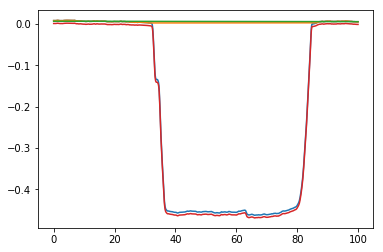

In [105]:
# BY LIENAR REGRESSION OF PERCENTILES


thre = 55
plt.plot(x,y)


x_percentile = x[y>np.percentile(y,thre)]
y_percentile = y[y>np.percentile(y,thre)]
plt.plot(x_percentile, y_percentile)
slope, intercept, r_value, p_value, std_err = stats.linregress(x_percentile,y_percentile)

y_lin = slope*x+intercept
plt.plot(x,y_lin)
plt.plot(x,y-y_lin)

# x[x>np.percentile(y,90)]
# [y>np.percentile(y,80)]


In [65]:
a = np.linspace(0,100)
idx = find_nearest_idx(a,50)
idx, a[idx],a[idx+1]
sections = [find_nearest_idx(a,val) for val in [10,20,30,35]]
sections, [a[s] for s in sections]

([5, 10, 15, 17],
 [10.204081632653061,
  20.408163265306122,
  30.612244897959183,
  34.69387755102041])

In [64]:
np.split(a,sections)

[array([0.        , 2.04081633, 4.08163265, 6.12244898, 8.16326531]),
 array([10.20408163, 12.24489796, 14.28571429, 16.32653061, 18.36734694]),
 array([20.40816327, 22.44897959, 24.48979592, 26.53061224, 28.57142857]),
 array([30.6122449 , 32.65306122]),
 array([ 34.69387755,  36.73469388,  38.7755102 ,  40.81632653,
         42.85714286,  44.89795918,  46.93877551,  48.97959184,
         51.02040816,  53.06122449,  55.10204082,  57.14285714,
         59.18367347,  61.2244898 ,  63.26530612,  65.30612245,
         67.34693878,  69.3877551 ,  71.42857143,  73.46938776,
         75.51020408,  77.55102041,  79.59183673,  81.63265306,
         83.67346939,  85.71428571,  87.75510204,  89.79591837,
         91.83673469,  93.87755102,  95.91836735,  97.95918367,
        100.        ])]